# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# 1st code cell 

# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
validation_file= '../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# 2nd code cell 

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train).union(set(y_valid)).union(set(y_test)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

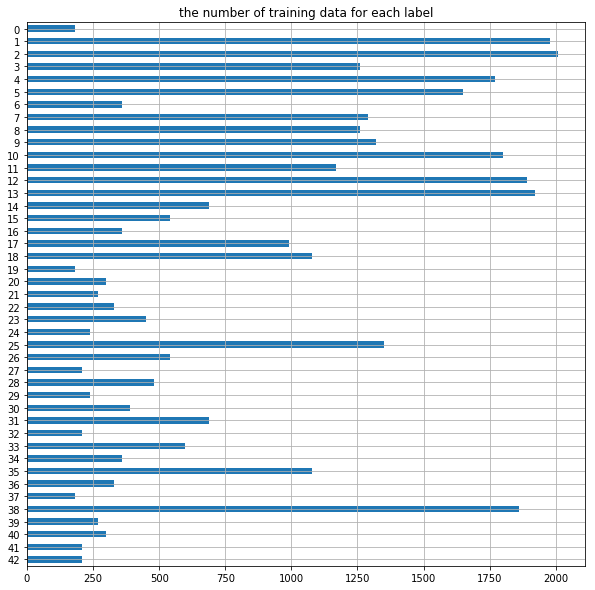

In [3]:
# 3rd code cell 

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline

# class balance
vcs = pd.Series(y_train).value_counts().sort_index(ascending=False)
vcs.plot(figsize=(10, 10), kind='barh', title="the number of training data for each label", grid=True)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Data Augmentation

In [4]:
# 4th code cell 

### augmentation logic is applied here.
# tensorflow data augmentation : http://tflearn.org/data_augmentation/#image-augmentation

# Is there any way to use the tflearn using carnd-term1 environment? 
# Current tensorflow is 0.12.1... so it may not be able to use it.
# This solution below may not be the efficient...

print("before : ", )
print(len(X_train))

from PIL import Image
import numpy as np
import random

# Use PIL or other library of the sort to rotate
def random_rotate(image_arr, max_deg=10.0):
    img_pil = Image.fromarray(image_arr)
    degree = max_deg * random.random()
    rot_img_pil = Image.Image.rotate(img_pil, degree)
    return np.array(rot_img_pil)


# Labeled data
df_y = pd.DataFrame(y_train)
target_label = [0, 16, 20, 21, 24, 27, 34, 40, 41] # target label (desribed later on)

# Rotation Augmentation
for label in target_label:
    # find the index of label
    idxs = (df_y[df_y[0] == label].index) 

    # compute the rotation new feature
    rot_X = []
    for idx in idxs:
        rot_X.append(random_rotate(X_train[idx], 10.0))
        rot_X.append(random_rotate(X_train[idx], 10.0)) # add one more time
        rot_X.append(random_rotate(X_train[idx], 10.0)) # add one more time
        rot_X.append(random_rotate(X_train[idx], 10.0)) # add one more time
    rot_X = np.array(rot_X)
    rot_y = np.array([label]*len(rot_X))

    # augment dataset
    X_train = np.concatenate((X_train, rot_X), axis=0)
    y_train = np.concatenate((y_train, rot_y), axis=0)

print("after : ", )
print(len(X_train))


before : 
34799
after : 
44519


### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
# 5th code cell 

### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

def rgb2gray(X):
    # http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
    out = np.dot(X[...,:3], [0.299, 0.587, 0.114]).astype(int)
    out = out.reshape(len(X), 32, 32, 1)
    return out

def normalization(X):
    out = (X - 128.0) / 128.
    return out

def preprocess_pipeline(X):
    X = rgb2gray(X)
    X = normalization(X)
    return X

def find_idx_label(y):
    out_index = []
    for i in range(43):
        out_index.append(list(y).index(i))
    return out_index

# visualize data for each label (takes a while)
"""
num = find_idx_label(y_train)
fig = plt.figure(figsize=(5, 2*len(num)))
df_num2name = pd.read_csv('./signnames.csv')
dict_num2name = dict(df_num2name['SignName'])

for i, i_fig in enumerate(num):
    cur_num = 2*i + 1
    ax = plt.subplot(len(num), 2, cur_num)
    ax.set_title(str(i) + ':'+ dict_num2name[i])
    ax.axis('off')
    ax.imshow(X_train[i_fig])
    cur_num = 2*i + 2
    ax = plt.subplot(len(num), 2, cur_num)
    ax.set_title('gray version')
    ax.axis('off')
    ax.imshow(rgb2gray(X_train)[i_fig].reshape(32,32), cmap = plt.cm.Greys_r)
plt.show()
"""

# apply hand-made preprocess pipeline
X_train = preprocess_pipeline(X_train)
X_valid = preprocess_pipeline(X_valid)
X_test = preprocess_pipeline(X_test)

# shuffle data, no need for validation and test set
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [6]:
# 6th code cell 

### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 20
BATCH_SIZE = 128

conv1_W = None
conv2_W = None
fc1_W = None
fc2_W = None

def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Layer 1 : 32x32x1 -> 14x14x18
    # Convolutiona l. Input = 32x32x1. Output = 28x28x18.
    with tf.name_scope('conv_1_scope'):
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 18), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(18))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
        conv1 = tf.nn.relu(conv1) # Activation.
        
    # Pooling & Dropout
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, 0.75)
    
    # Layer 2 : 14x14x18 -> 5x5x54
    # Convolutiona 2. Input = 14x14,18 -> Output = 10x10x54.
    with tf.name_scope('conv_2_scope'):
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 18, 54), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(54))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
        conv2 = tf.nn.relu(conv2) # Activation.

    # Pooling & Dropout
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, 0.75)

    # Flatten. Input = 5x5x54. Output = 1350.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1350. Output = 300.
    with tf.name_scope('fc1_scope'):
        fc1_W = tf.Variable(tf.truncated_normal(shape=(1350, 300), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(300))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
        fc1   = tf.nn.relu(fc1)

    # Dropout
    fc1   = tf.nn.dropout(fc1, 0.75)

    # Layer 4: Fully Connected. Input = 300. Output = 100.
    with tf.name_scope('fc2_scope'):
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(300, 100), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(100))
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b
        fc2    = tf.nn.relu(fc2)

    # Dropout
    fc2    = tf.nn.dropout(fc2, 0.75)

    # Layer 5: Fully Connected. Input = 100. Output = 10.
    with tf.name_scope('fc3_scope'):
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, n_classes), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(n_classes))
        
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

# set tensorflow variables
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

EPOCH 1 ...
Training Accuracy = 0.766
Validation Accuracy = 0.678
Test Accuracy = 0.676
Normalized confusion matrix


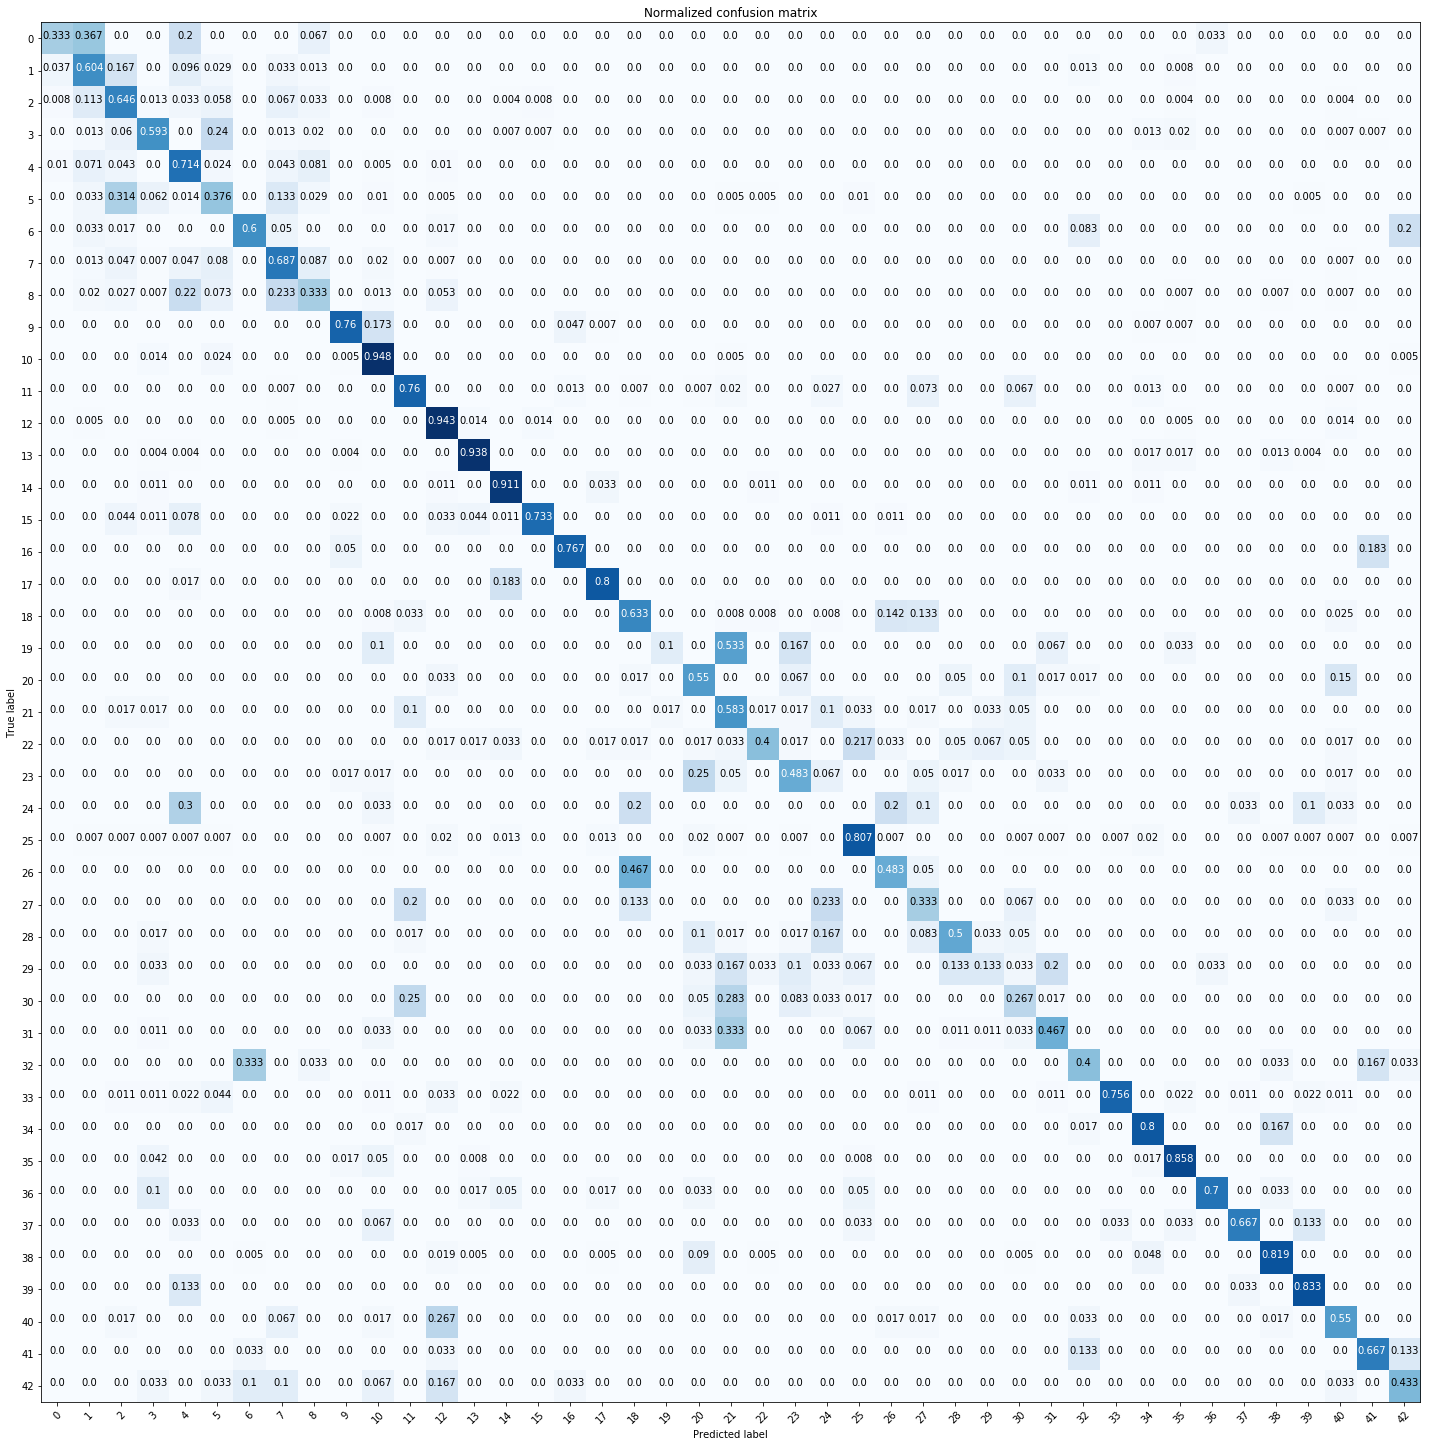

EPOCH 2 ...
Training Accuracy = 0.896
Validation Accuracy = 0.831
Test Accuracy = 0.811
Normalized confusion matrix


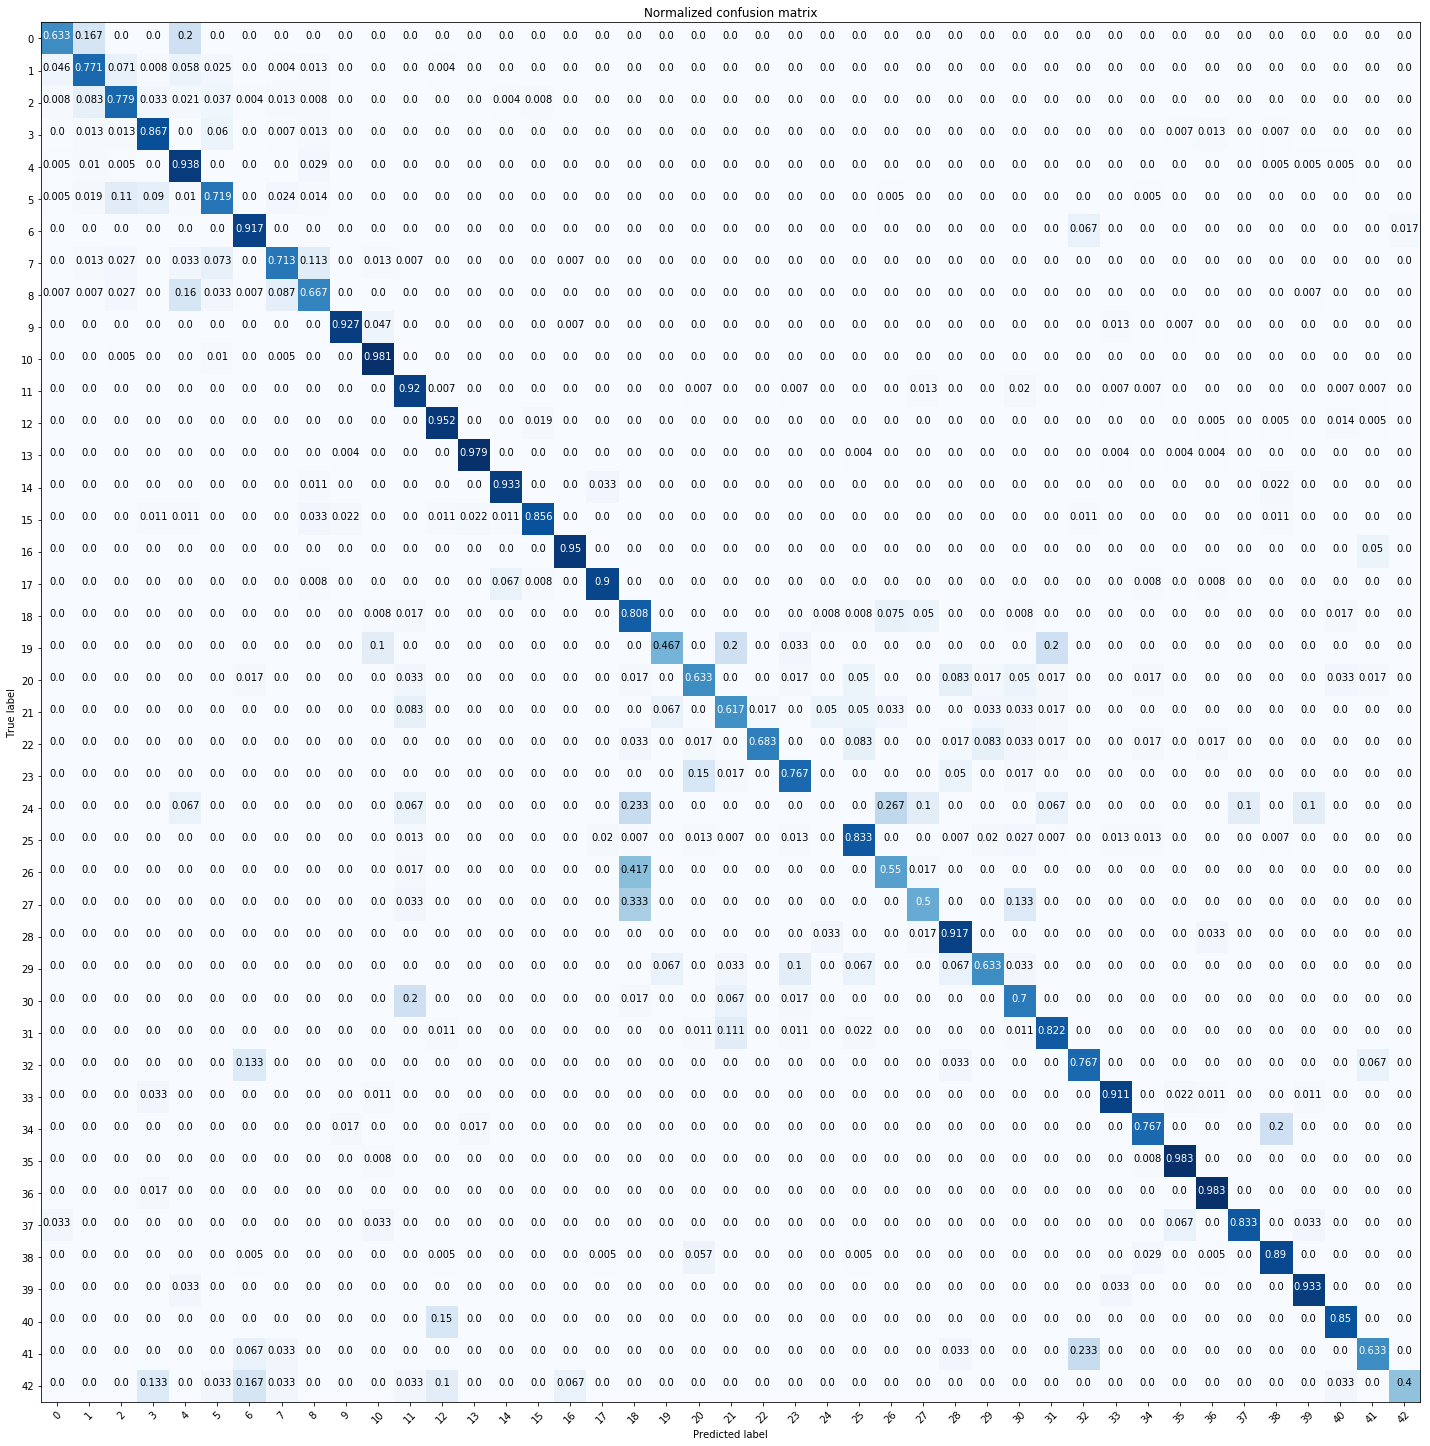

EPOCH 3 ...
Training Accuracy = 0.934
Validation Accuracy = 0.870
Test Accuracy = 0.855
Normalized confusion matrix


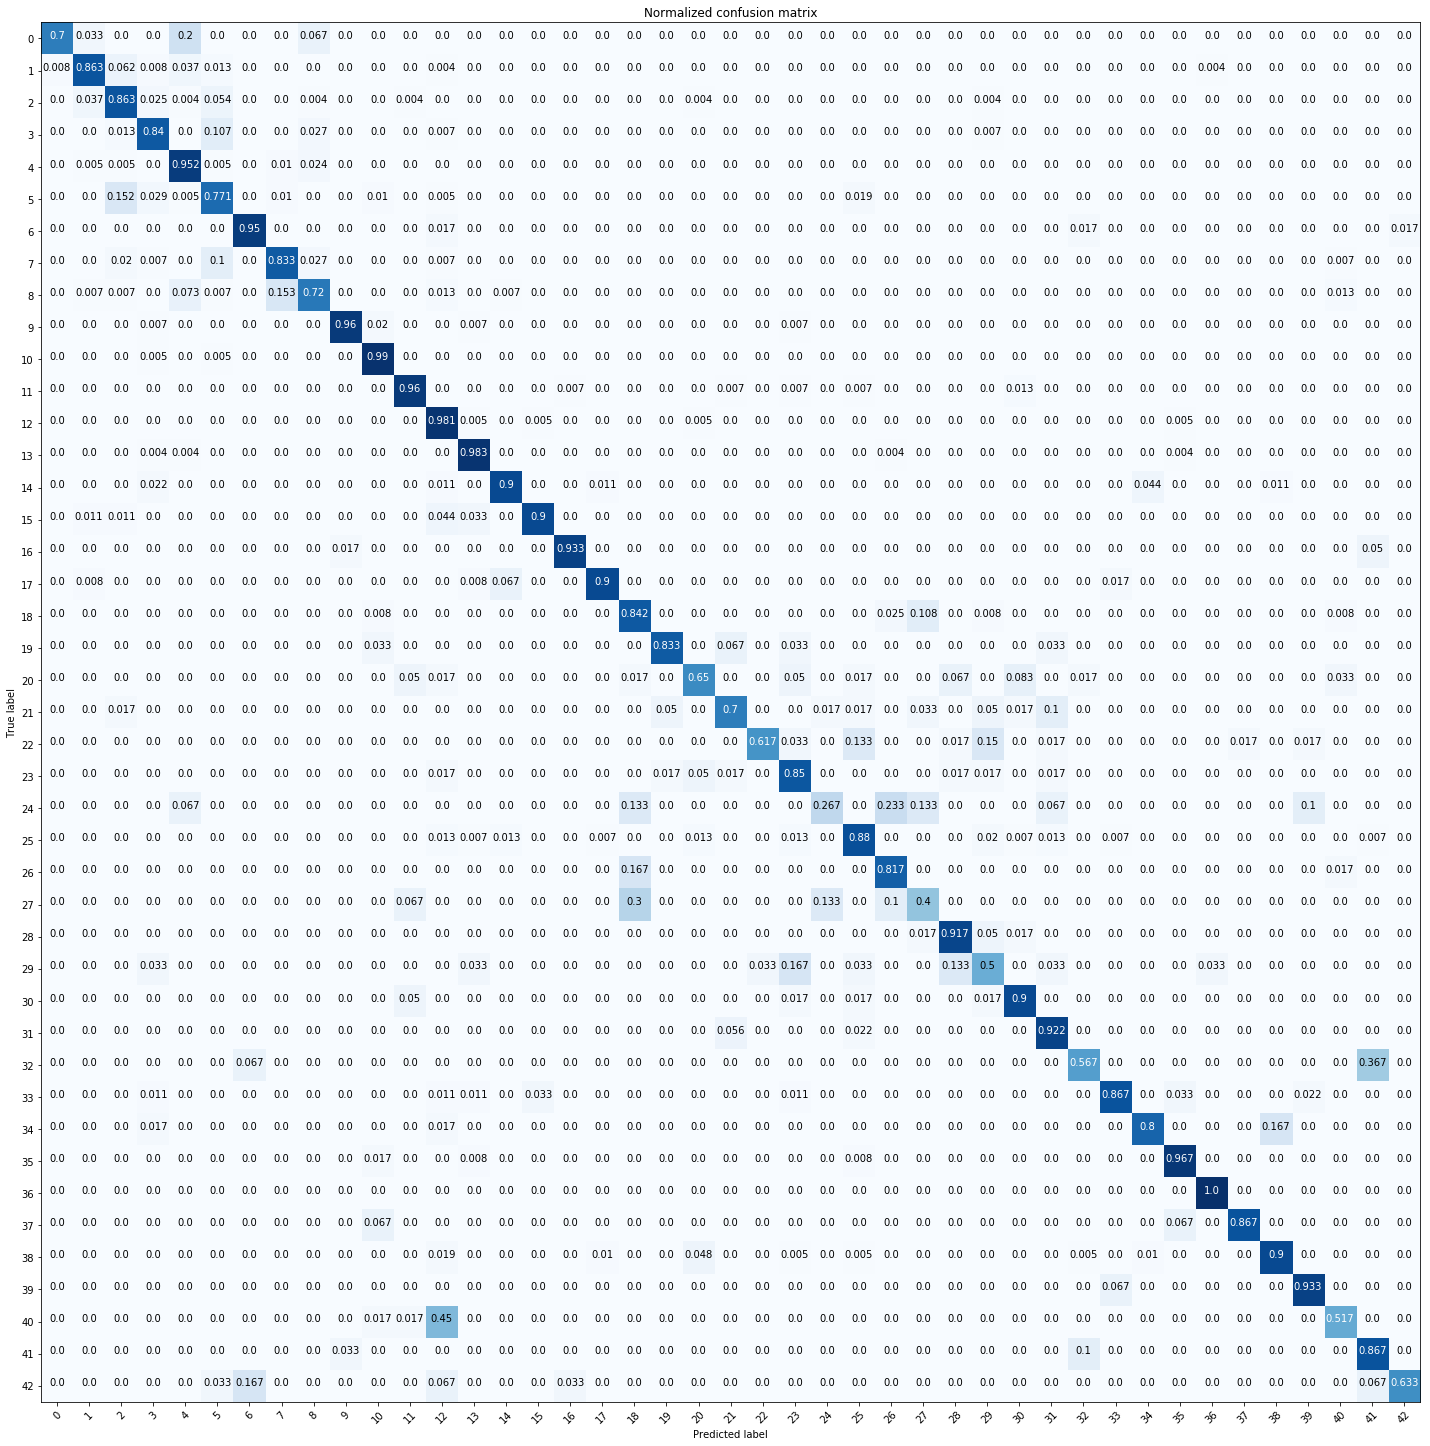

EPOCH 4 ...
Training Accuracy = 0.952
Validation Accuracy = 0.888
Test Accuracy = 0.870
Normalized confusion matrix


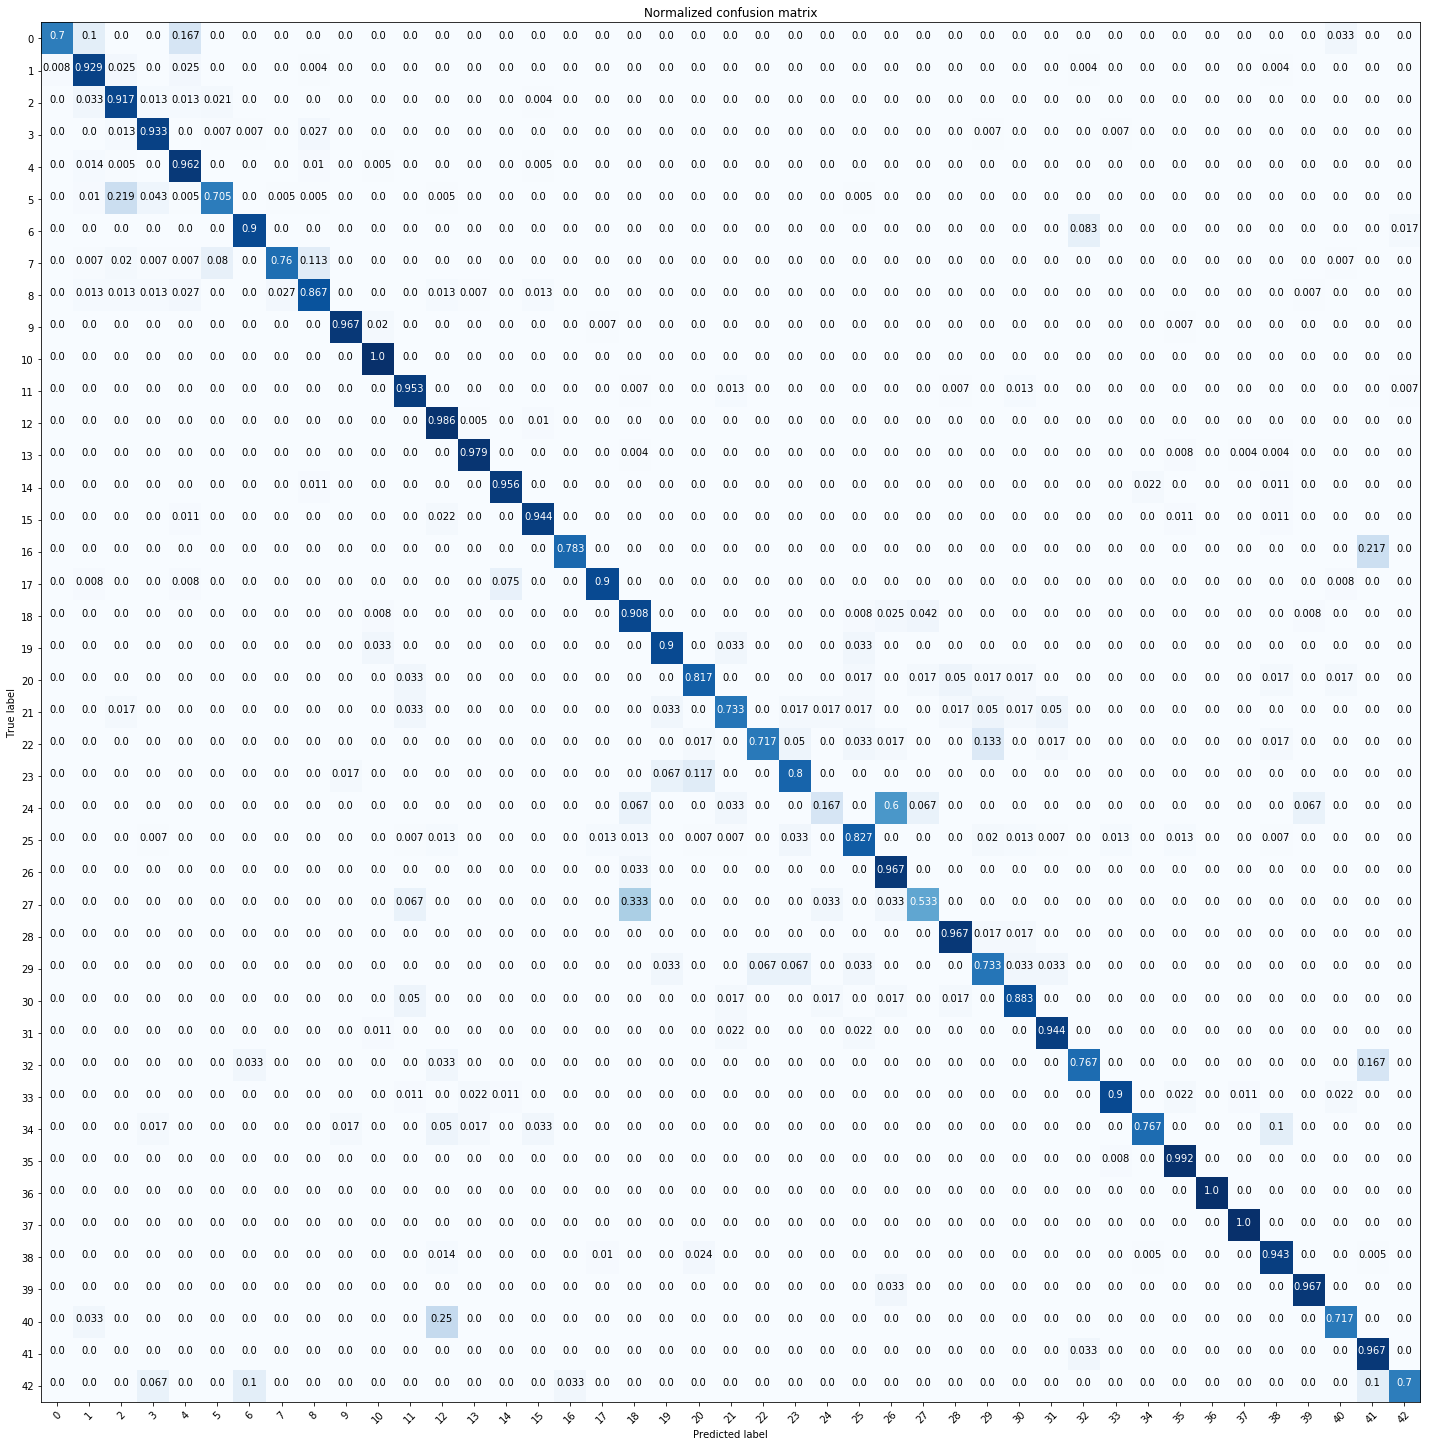

EPOCH 5 ...
Training Accuracy = 0.962
Validation Accuracy = 0.902
Test Accuracy = 0.884
Normalized confusion matrix


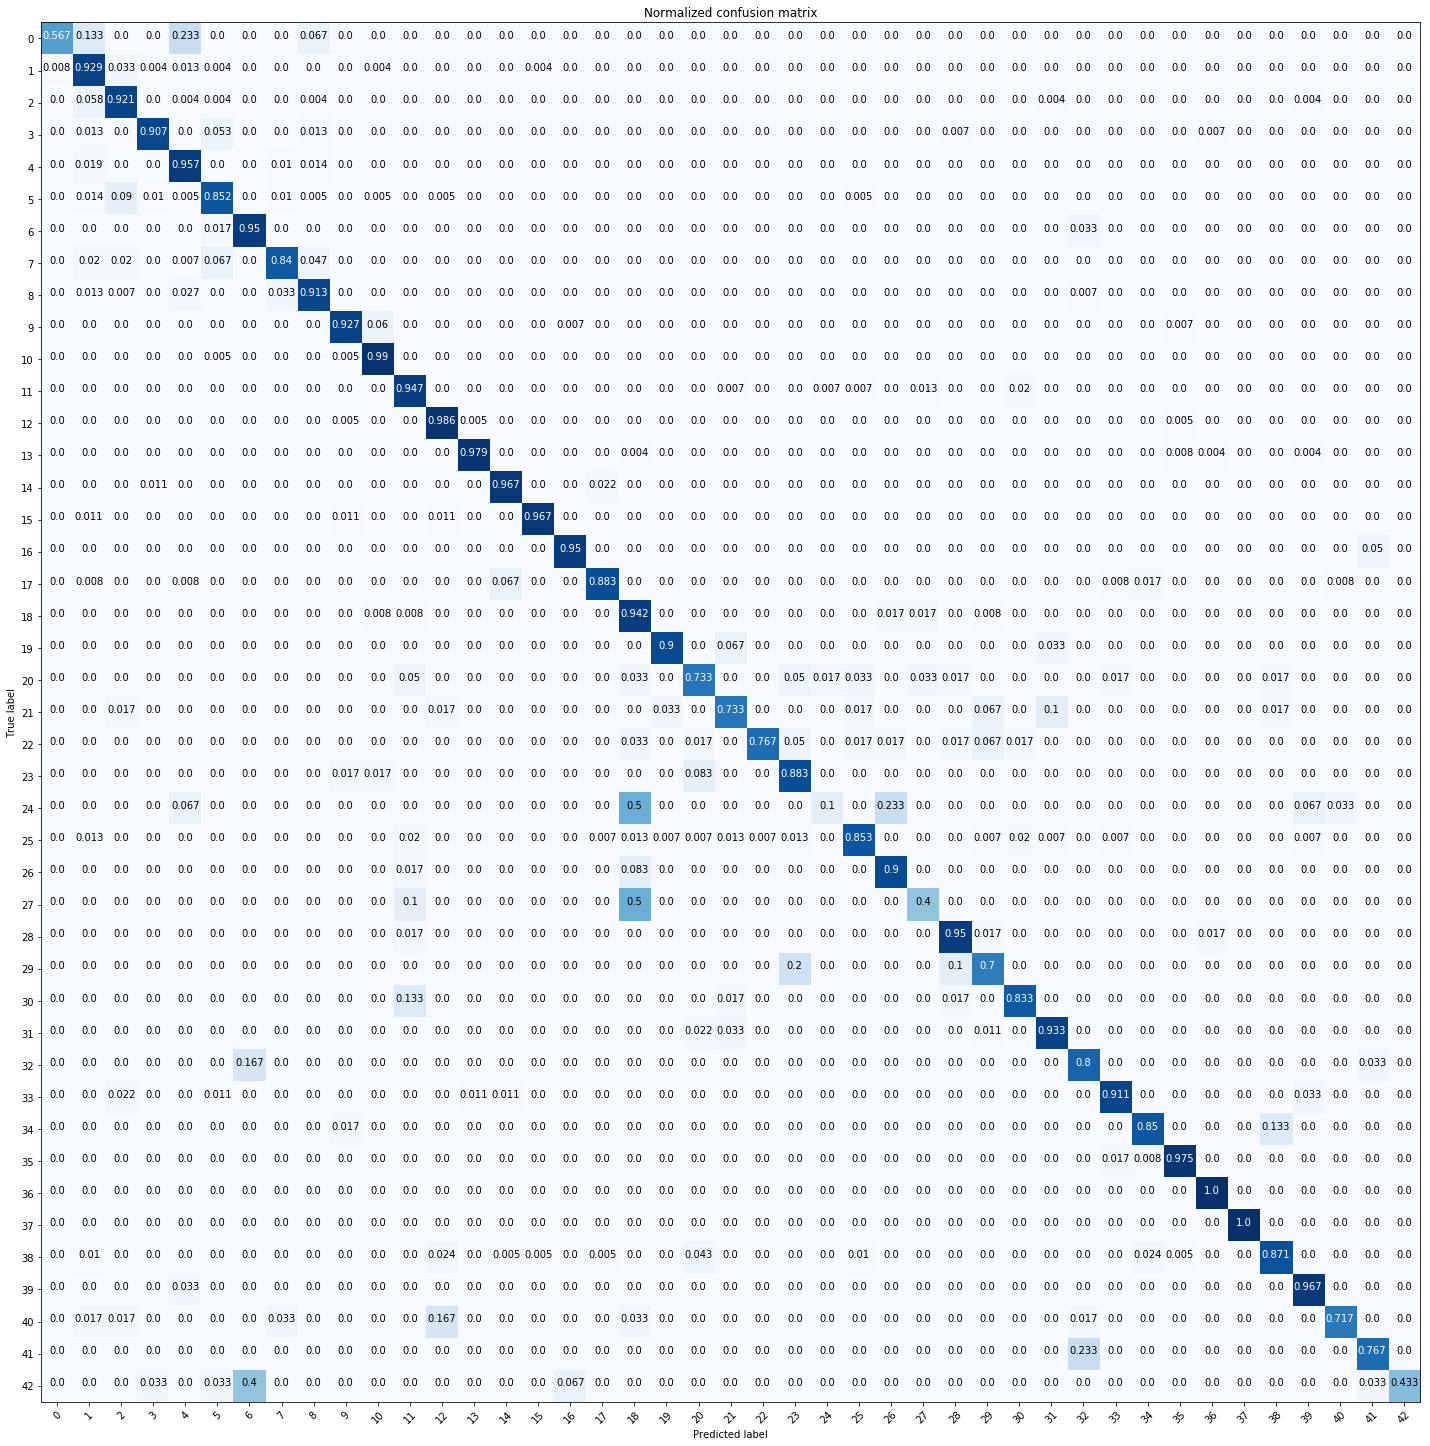

EPOCH 6 ...
Training Accuracy = 0.969
Validation Accuracy = 0.905
Test Accuracy = 0.891
Normalized confusion matrix


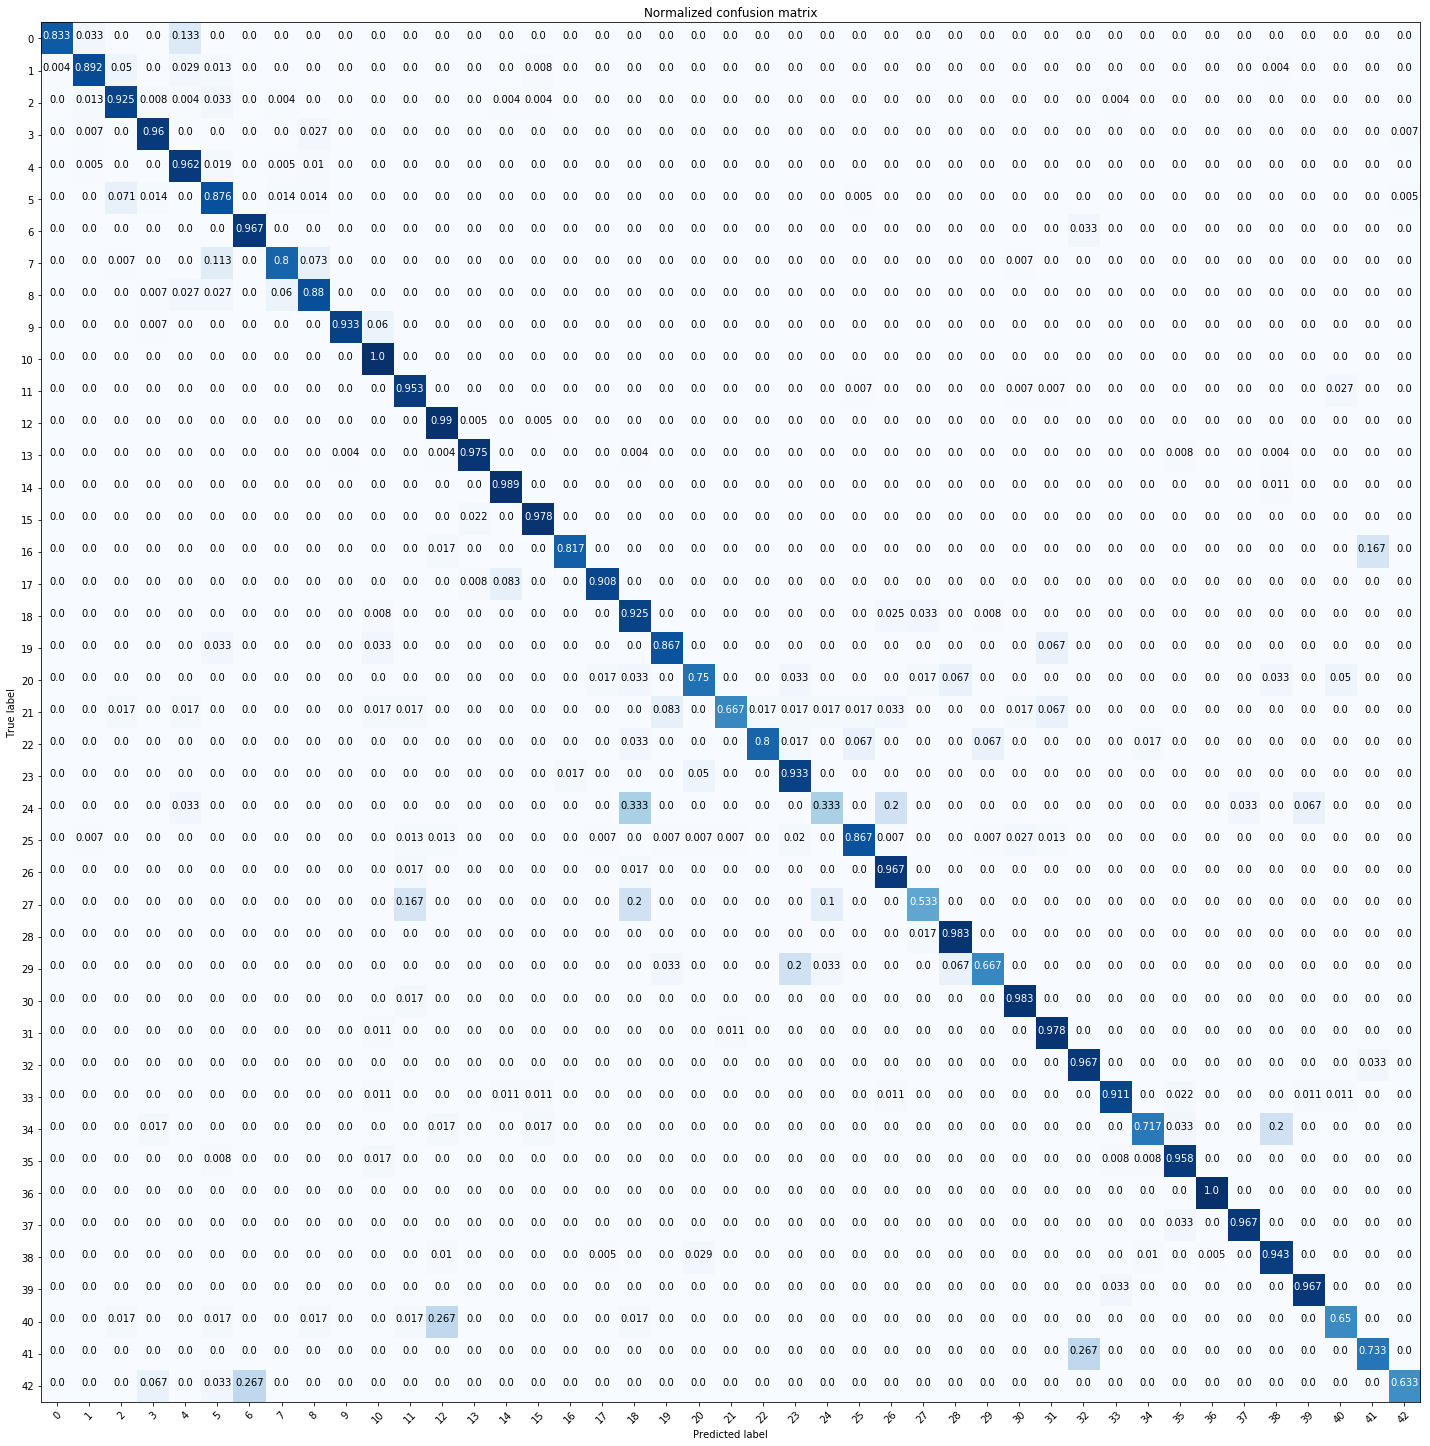

EPOCH 7 ...
Training Accuracy = 0.974
Validation Accuracy = 0.909
Test Accuracy = 0.902
Normalized confusion matrix


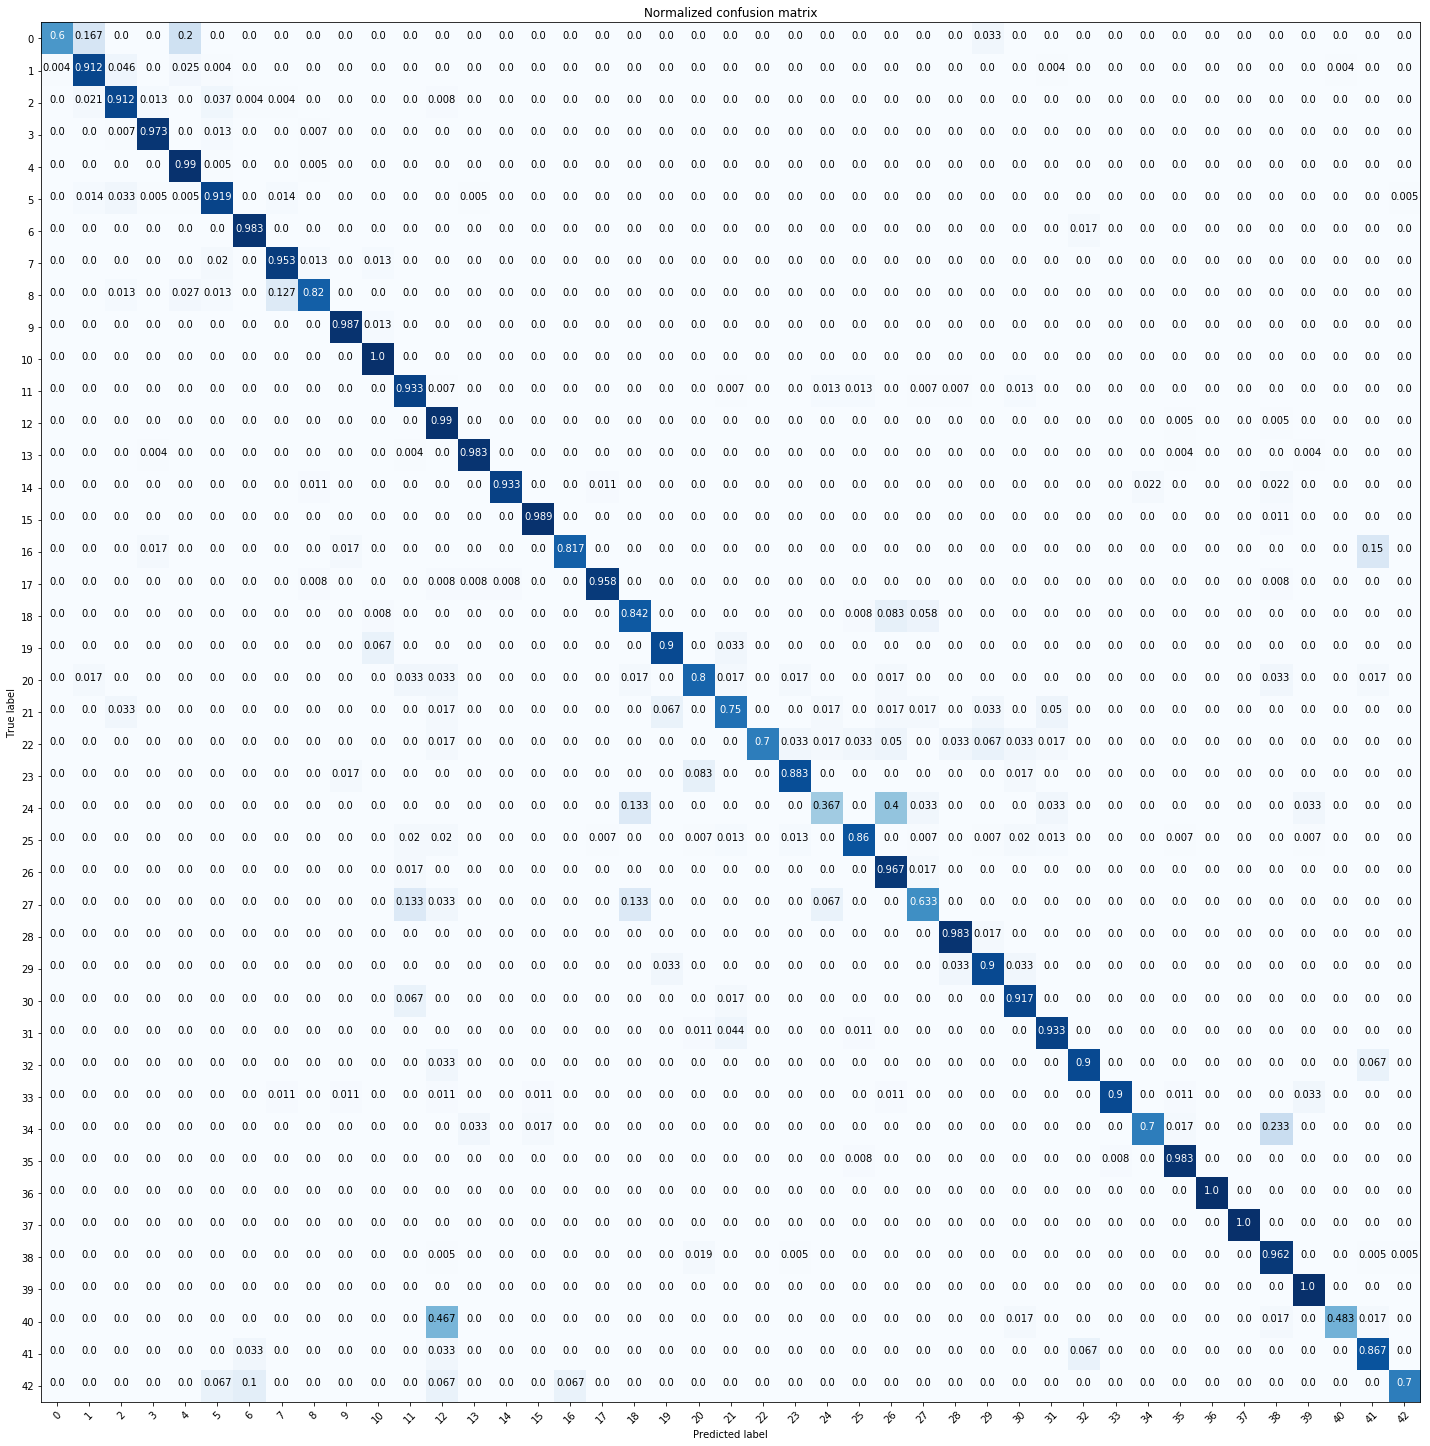

EPOCH 8 ...
Training Accuracy = 0.975
Validation Accuracy = 0.912
Test Accuracy = 0.904
Normalized confusion matrix


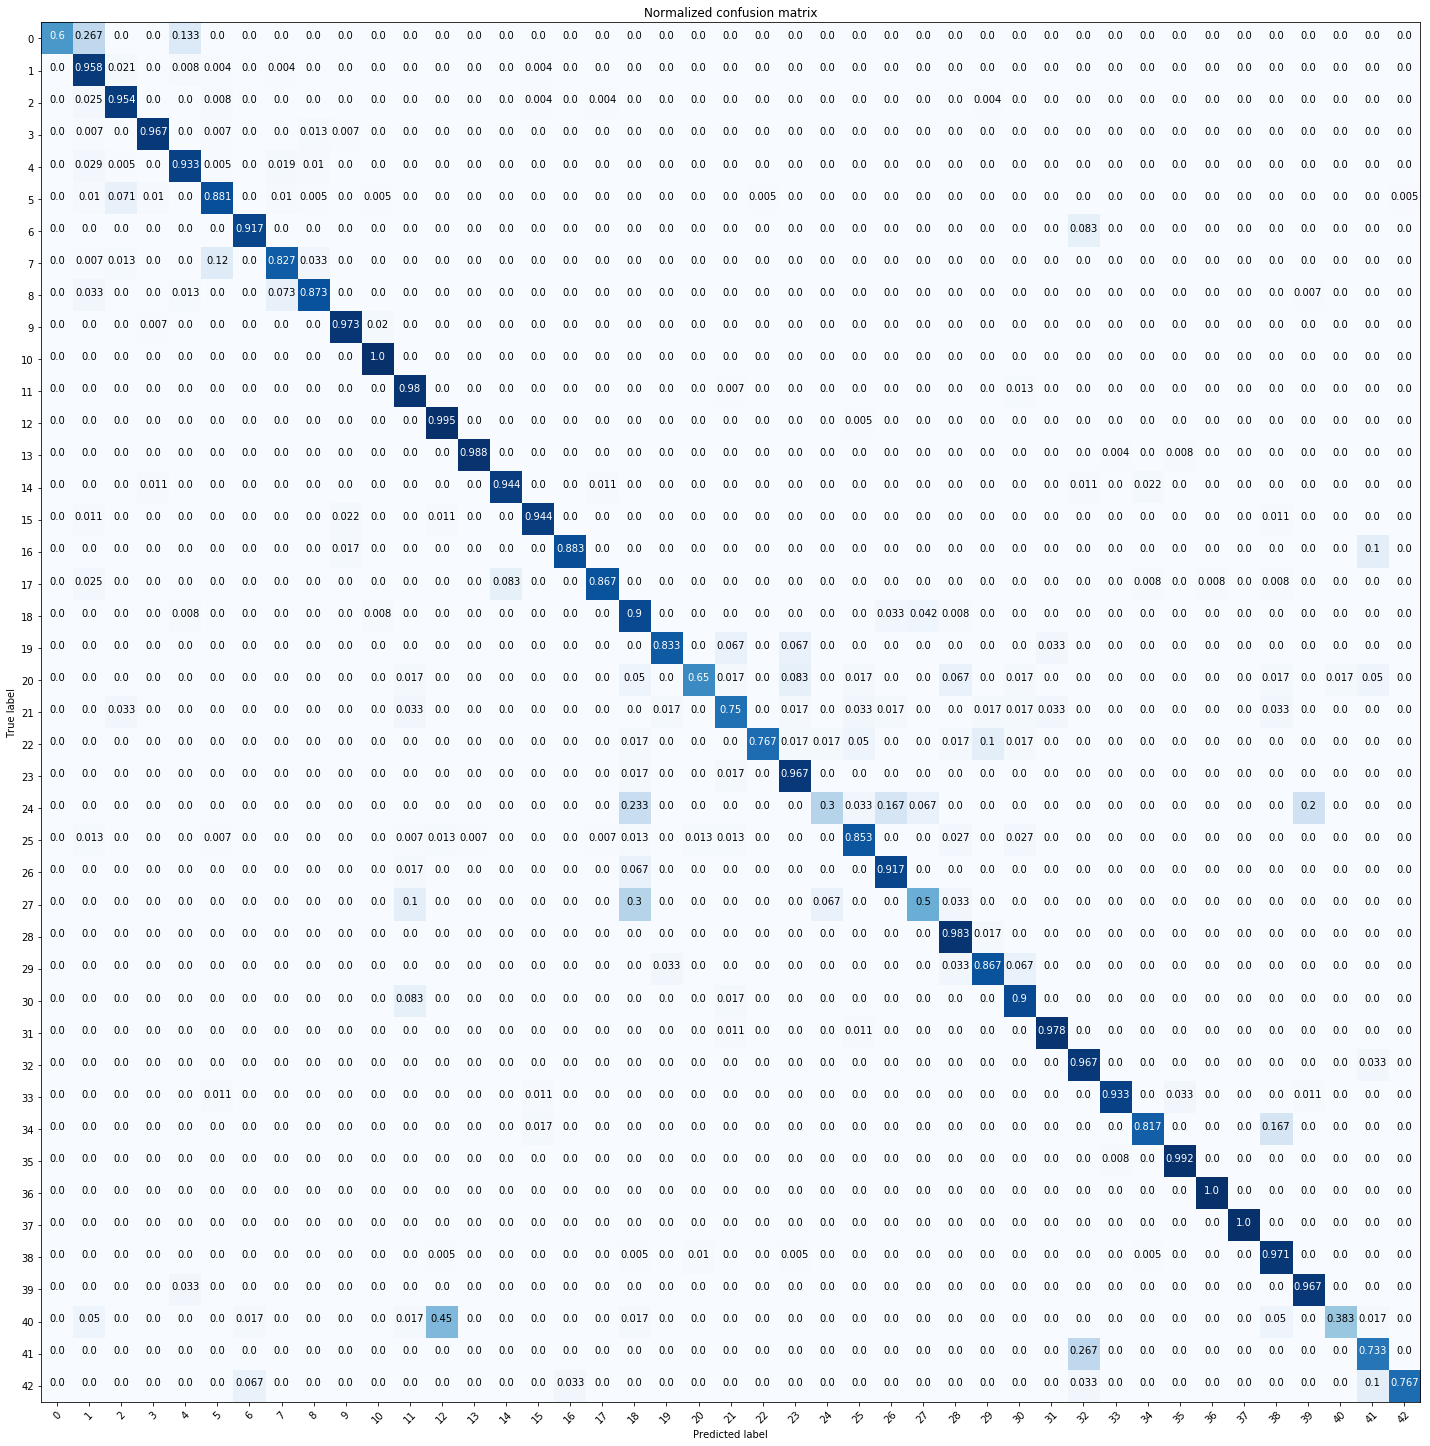

EPOCH 9 ...
Training Accuracy = 0.982
Validation Accuracy = 0.923
Test Accuracy = 0.911
Normalized confusion matrix


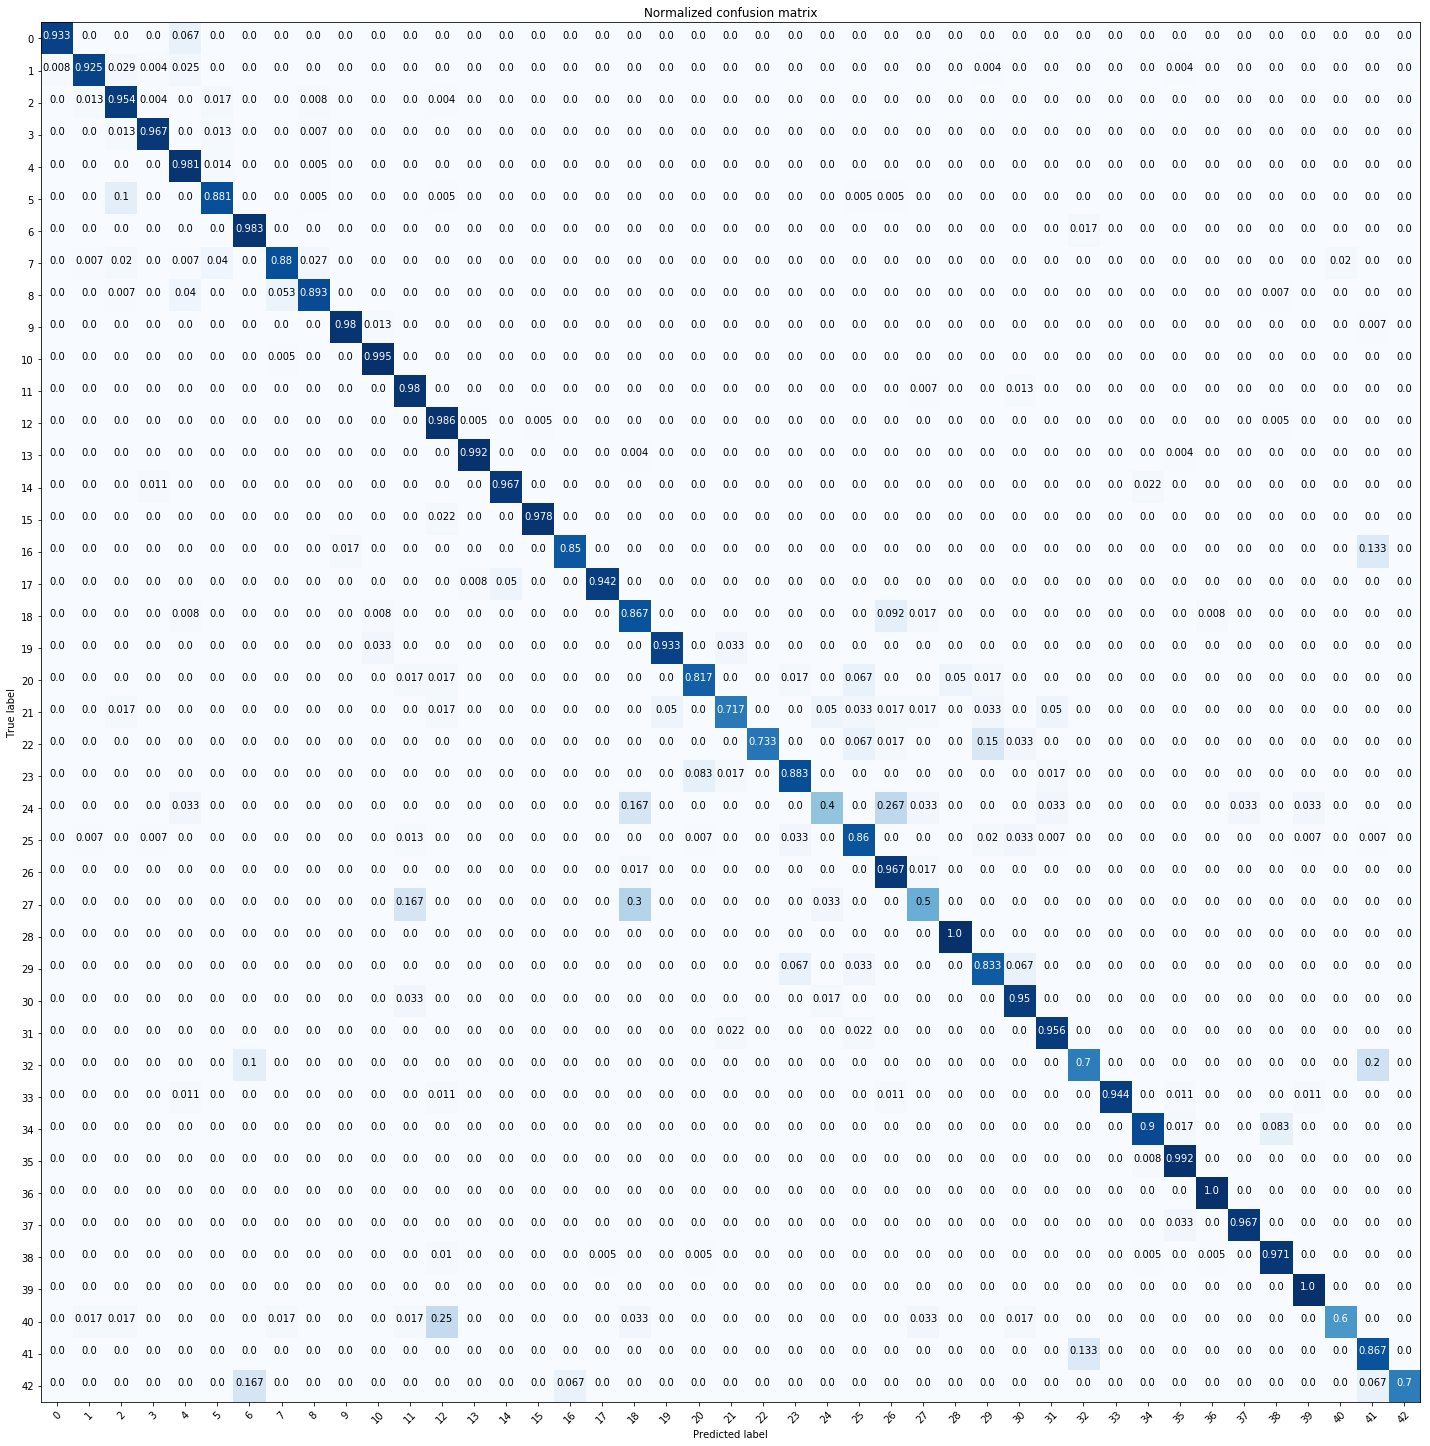

EPOCH 10 ...
Training Accuracy = 0.977
Validation Accuracy = 0.915
Test Accuracy = 0.904
Normalized confusion matrix


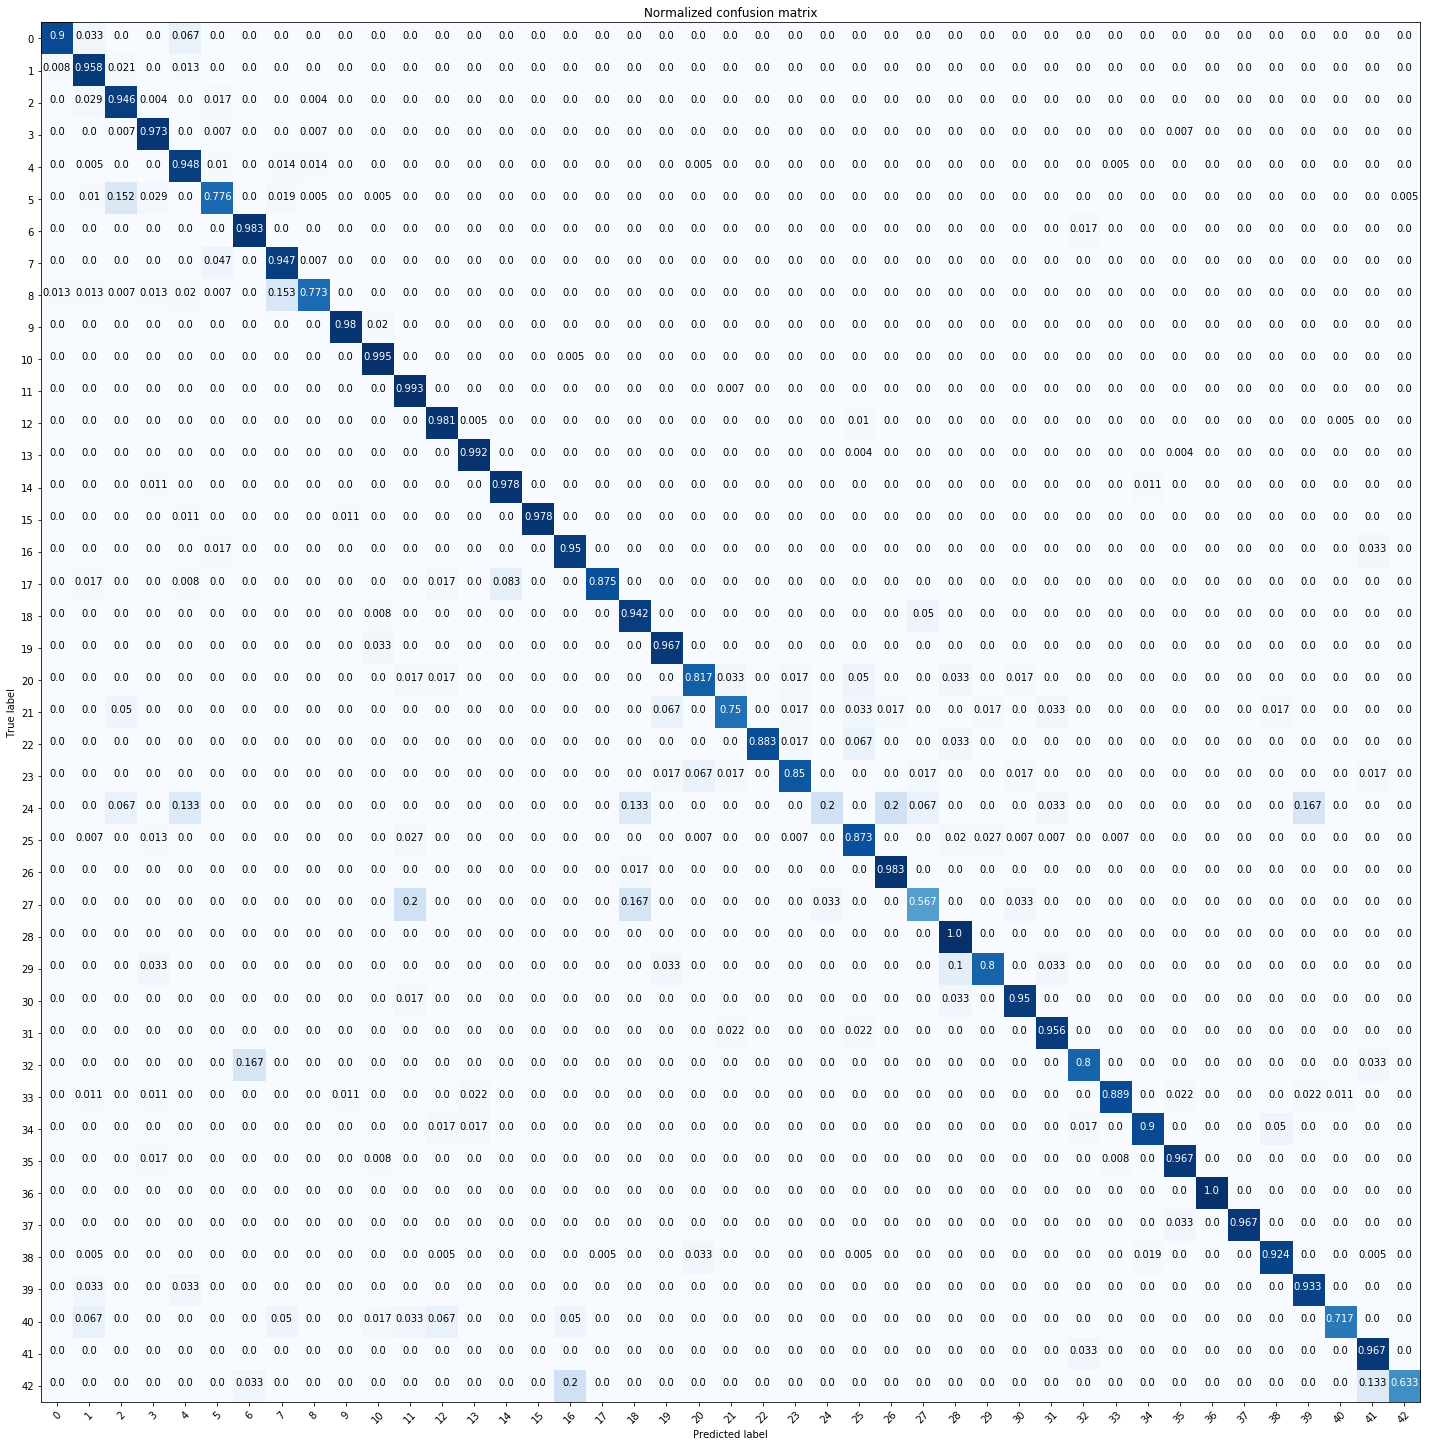

EPOCH 11 ...
Training Accuracy = 0.979
Validation Accuracy = 0.926
Test Accuracy = 0.907
Normalized confusion matrix


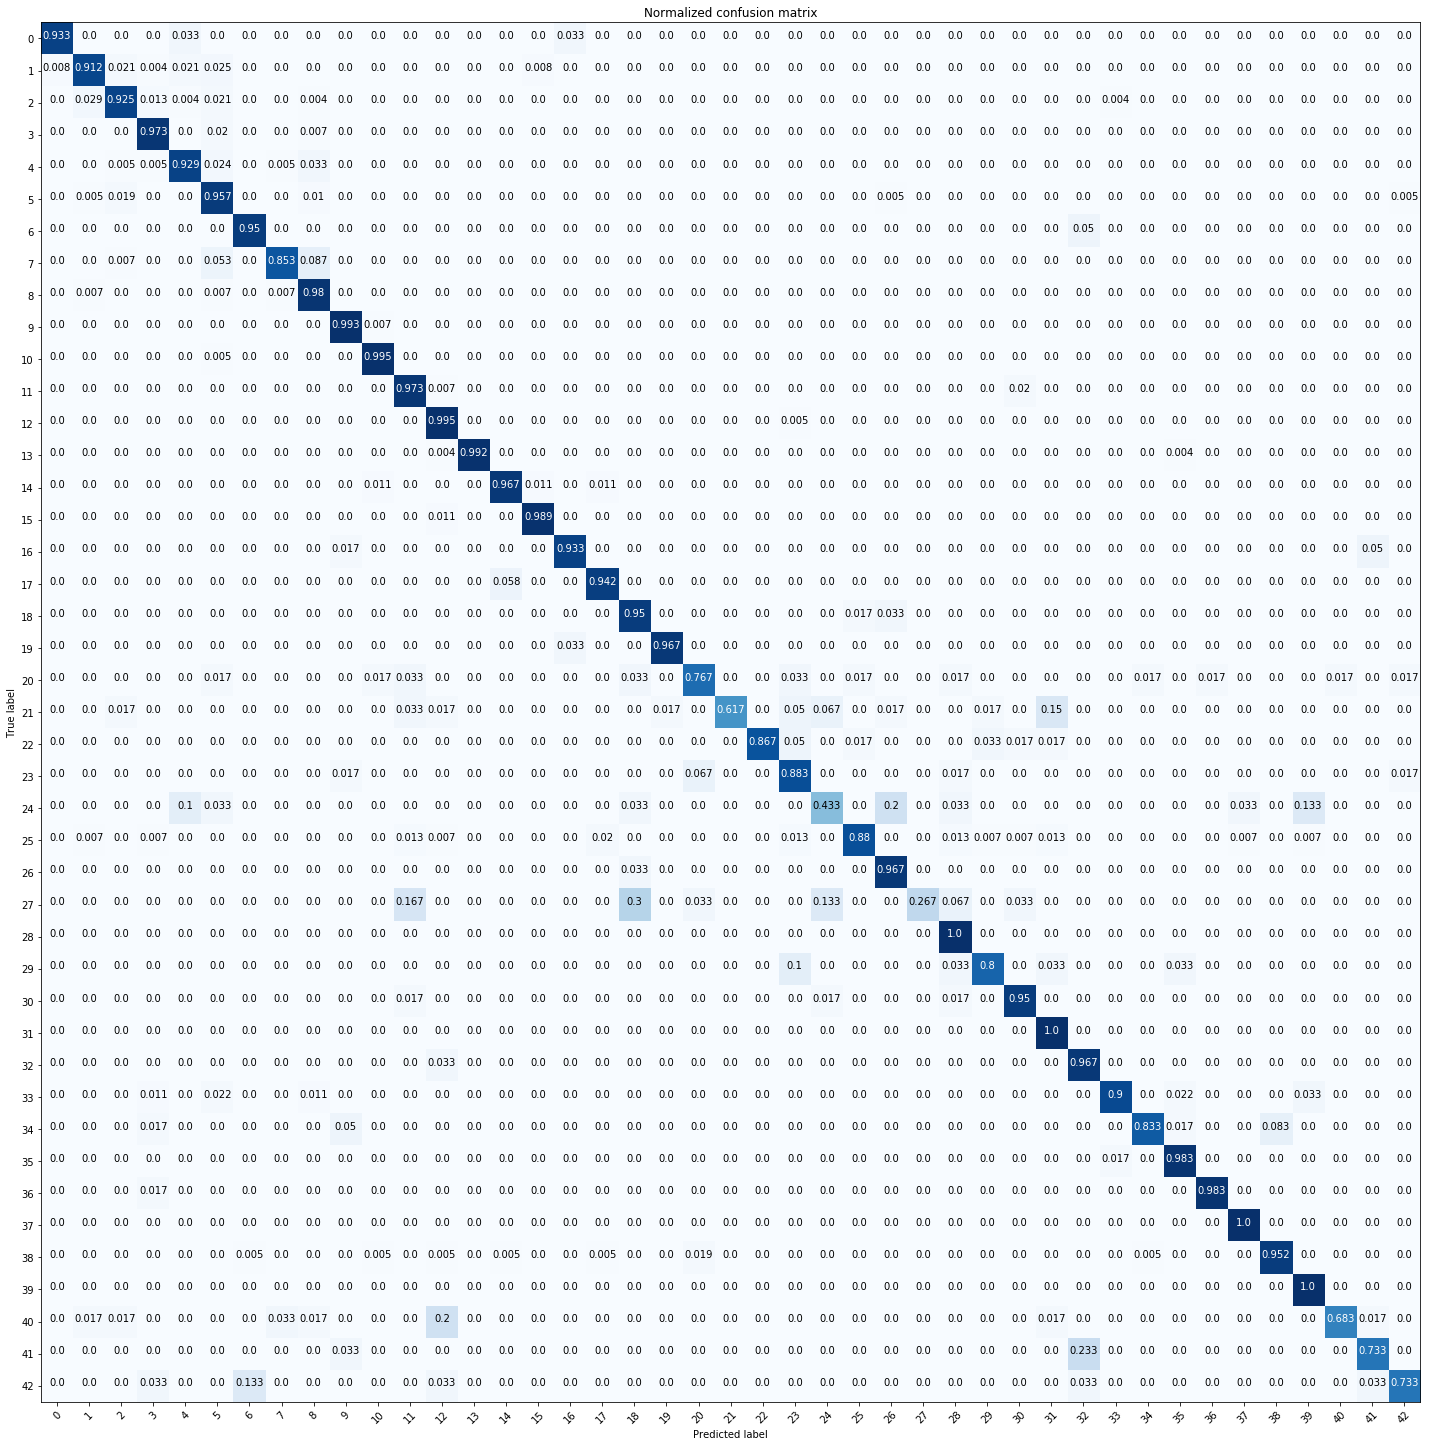

EPOCH 12 ...
Training Accuracy = 0.985
Validation Accuracy = 0.923
Test Accuracy = 0.914
Normalized confusion matrix


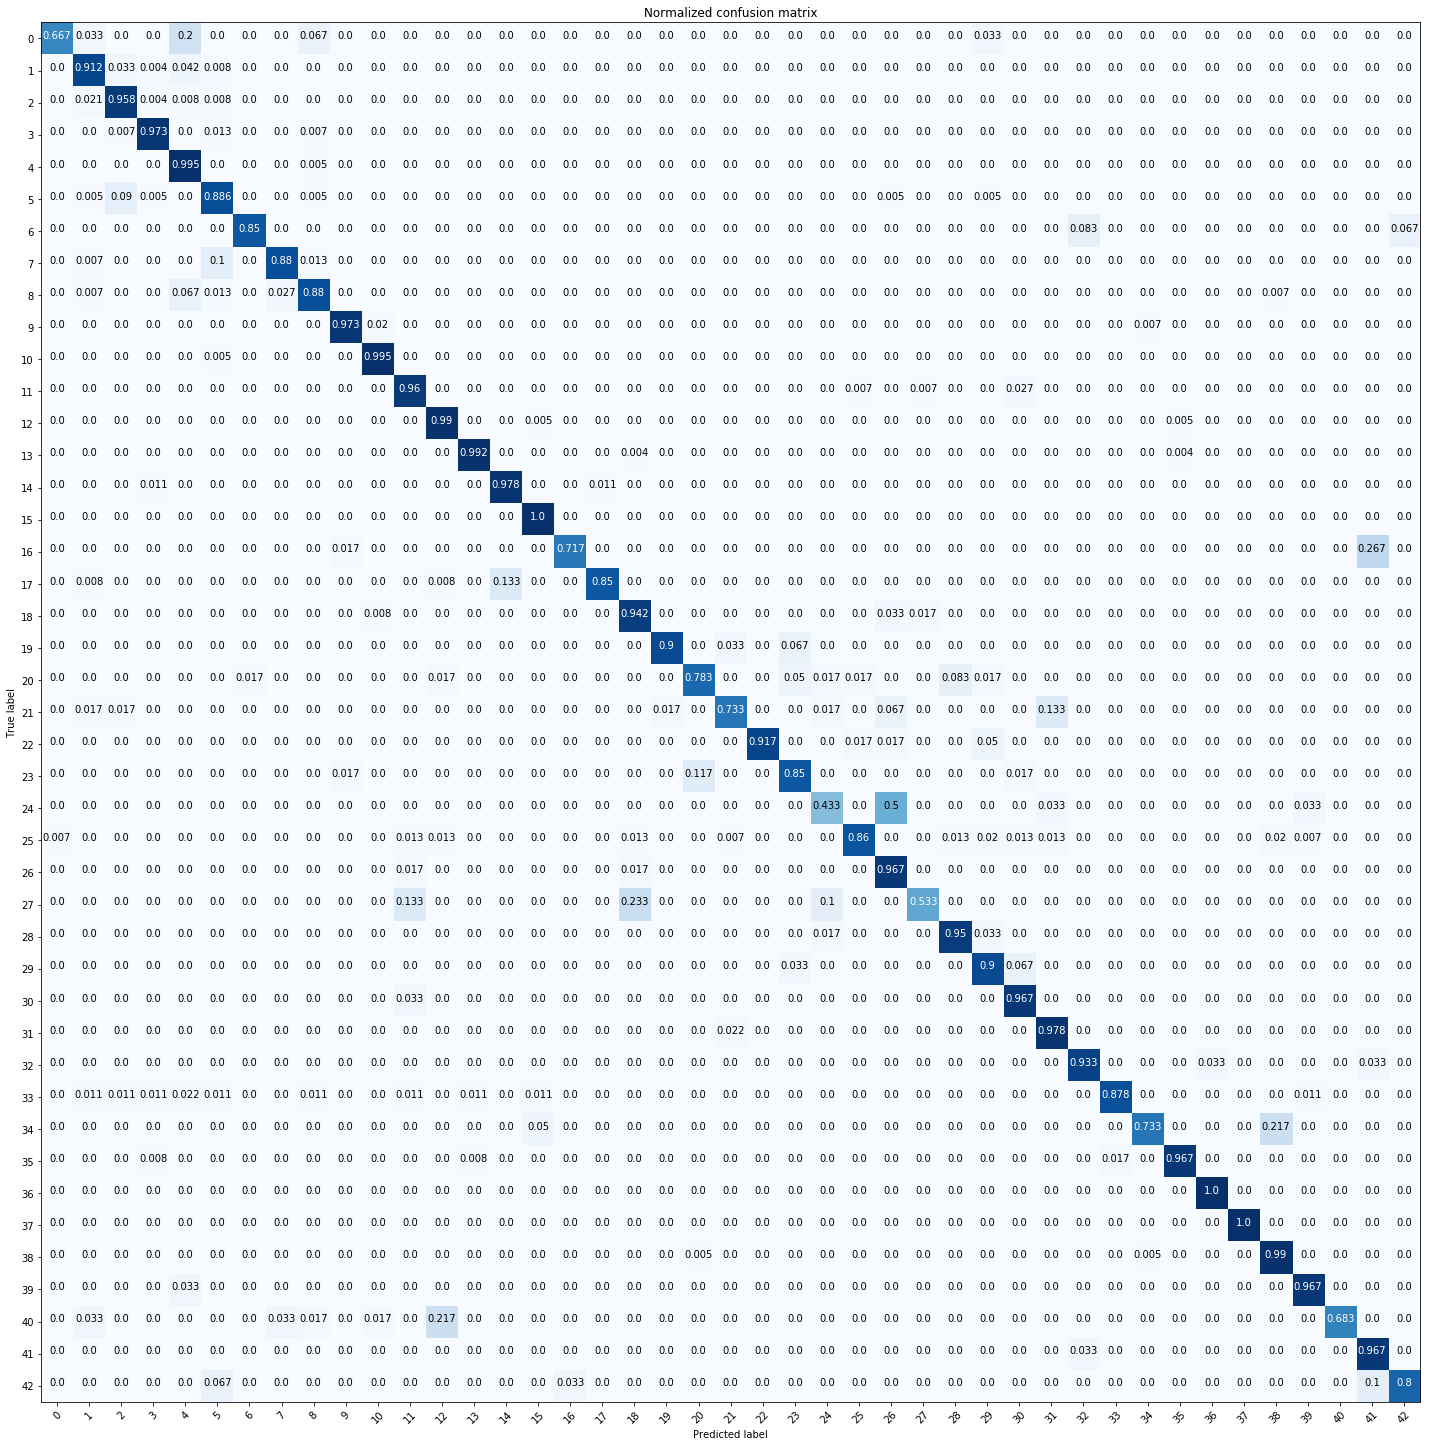

EPOCH 13 ...
Training Accuracy = 0.984
Validation Accuracy = 0.934
Test Accuracy = 0.914
Normalized confusion matrix


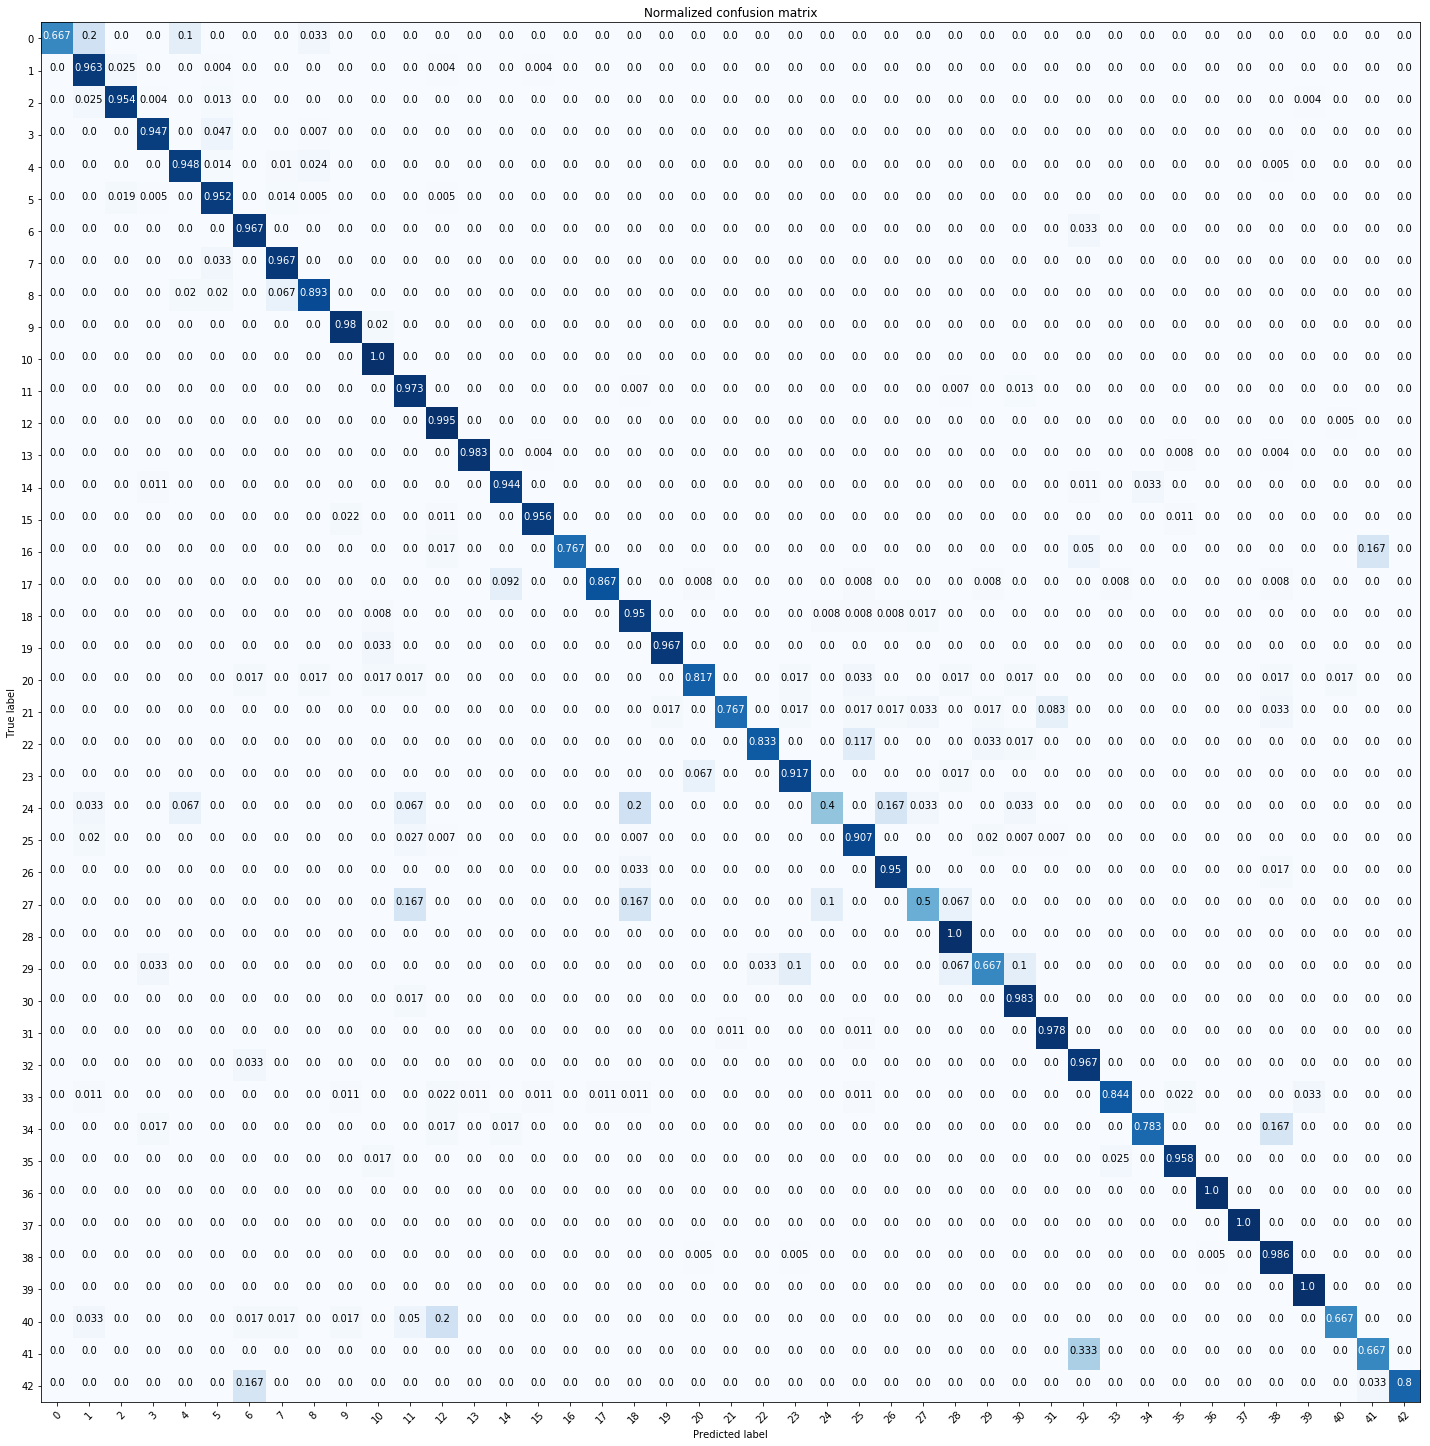

EPOCH 14 ...
Training Accuracy = 0.988
Validation Accuracy = 0.935
Test Accuracy = 0.917
Normalized confusion matrix


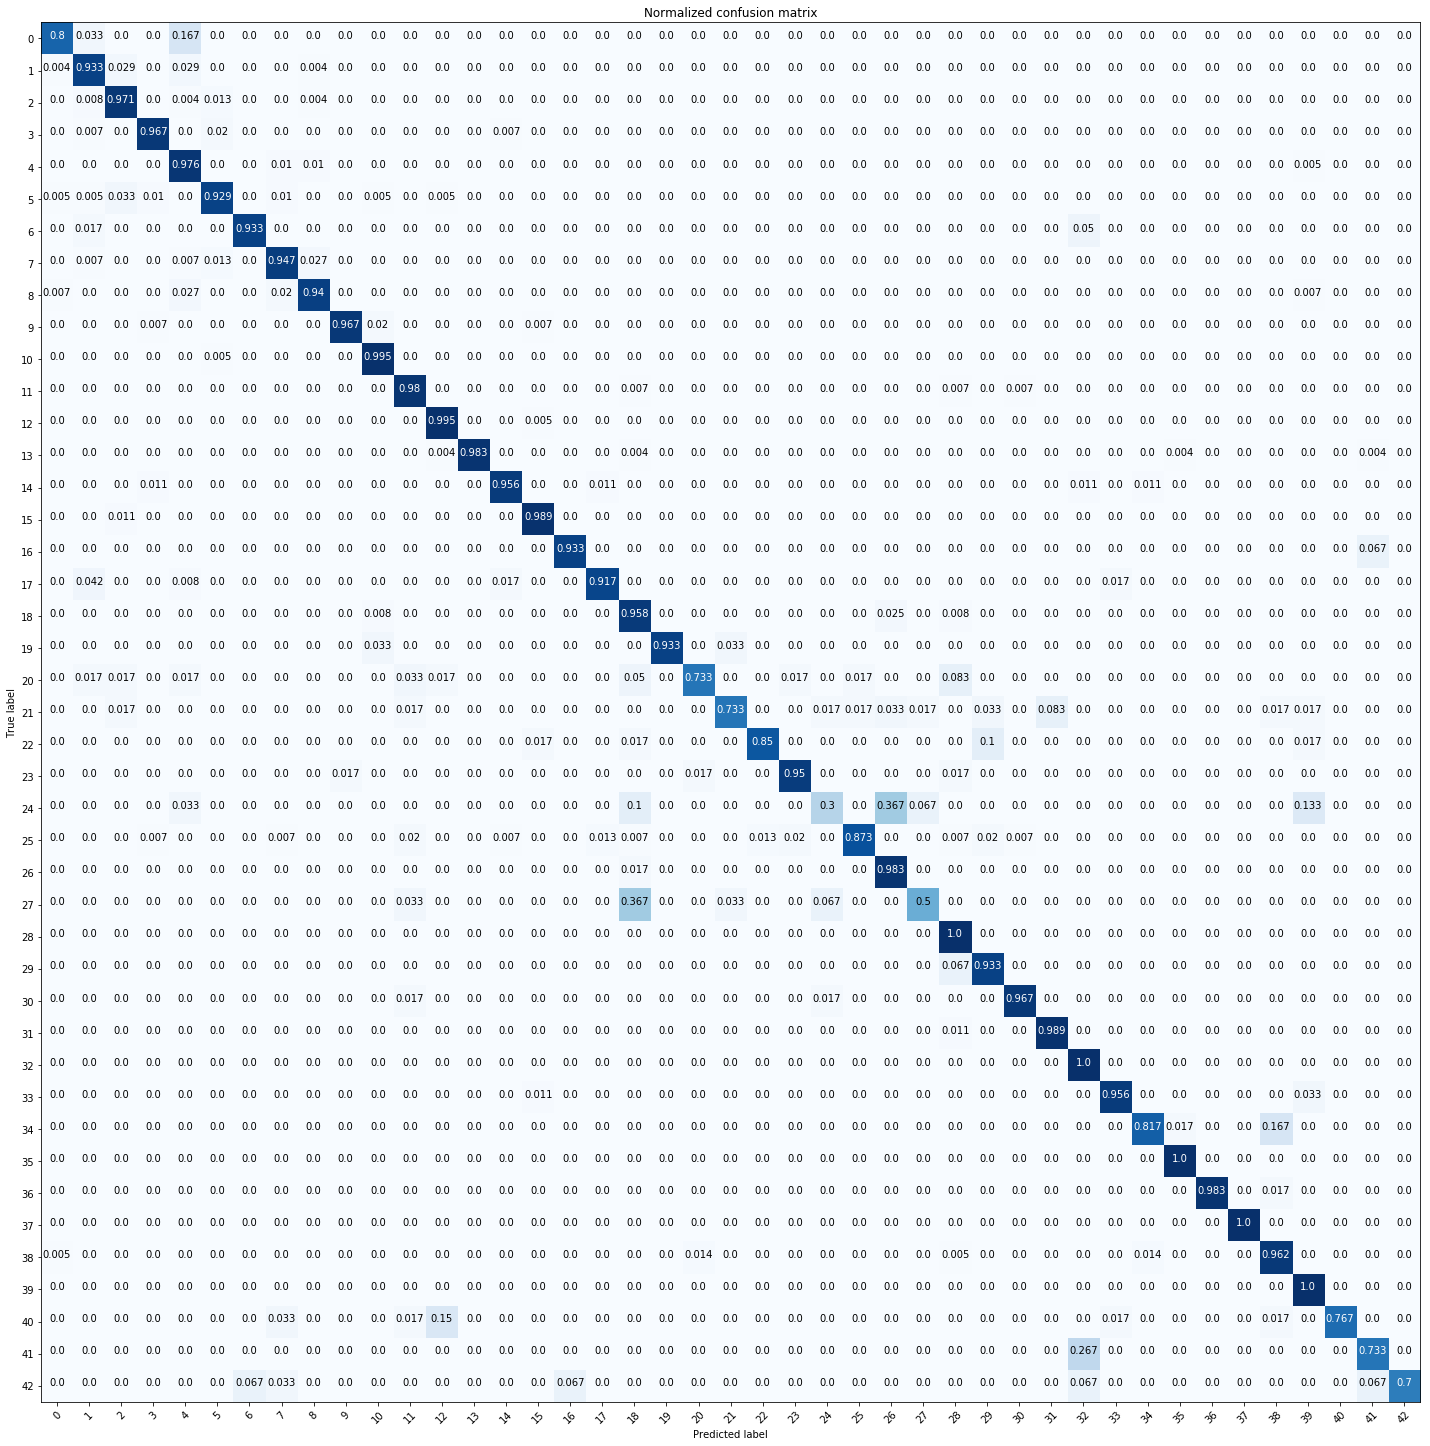

EPOCH 15 ...
Training Accuracy = 0.987
Validation Accuracy = 0.939
Test Accuracy = 0.915
Normalized confusion matrix


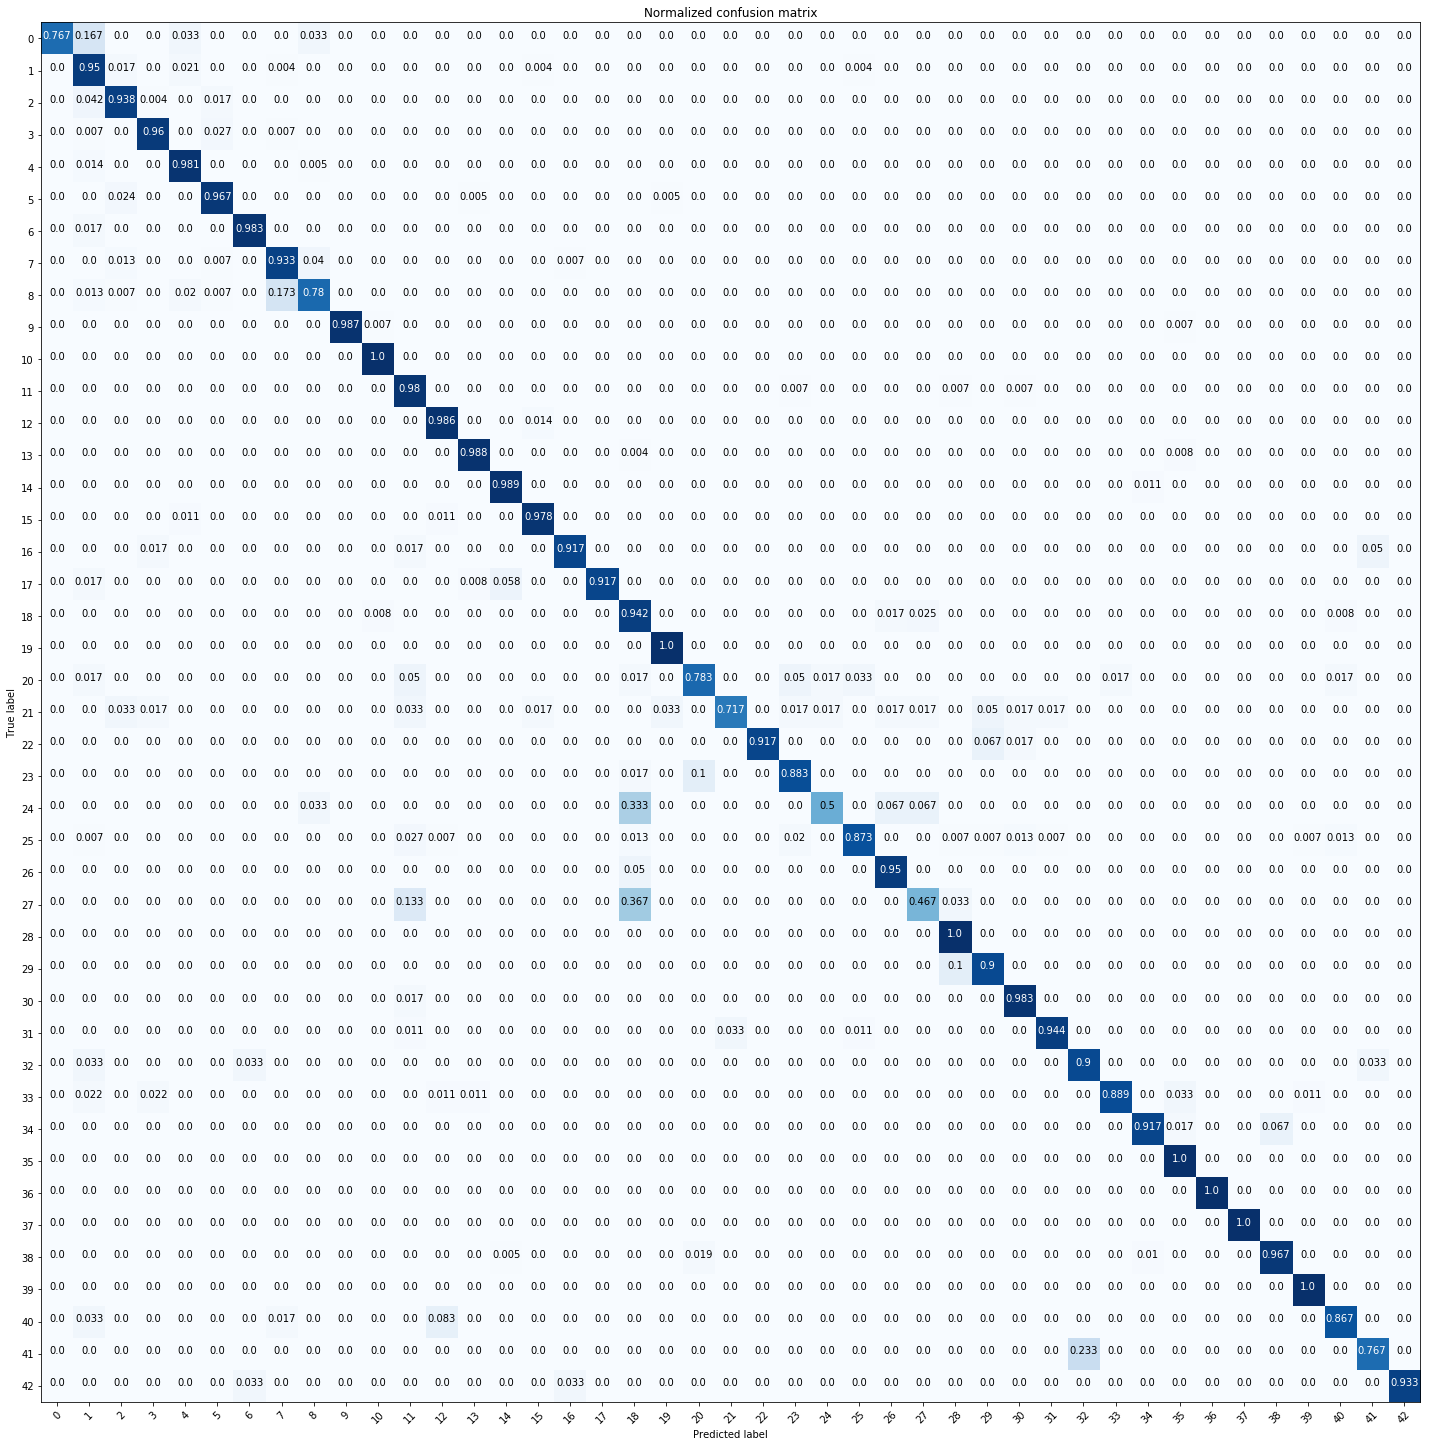

EPOCH 16 ...
Training Accuracy = 0.989
Validation Accuracy = 0.945
Test Accuracy = 0.924
Normalized confusion matrix


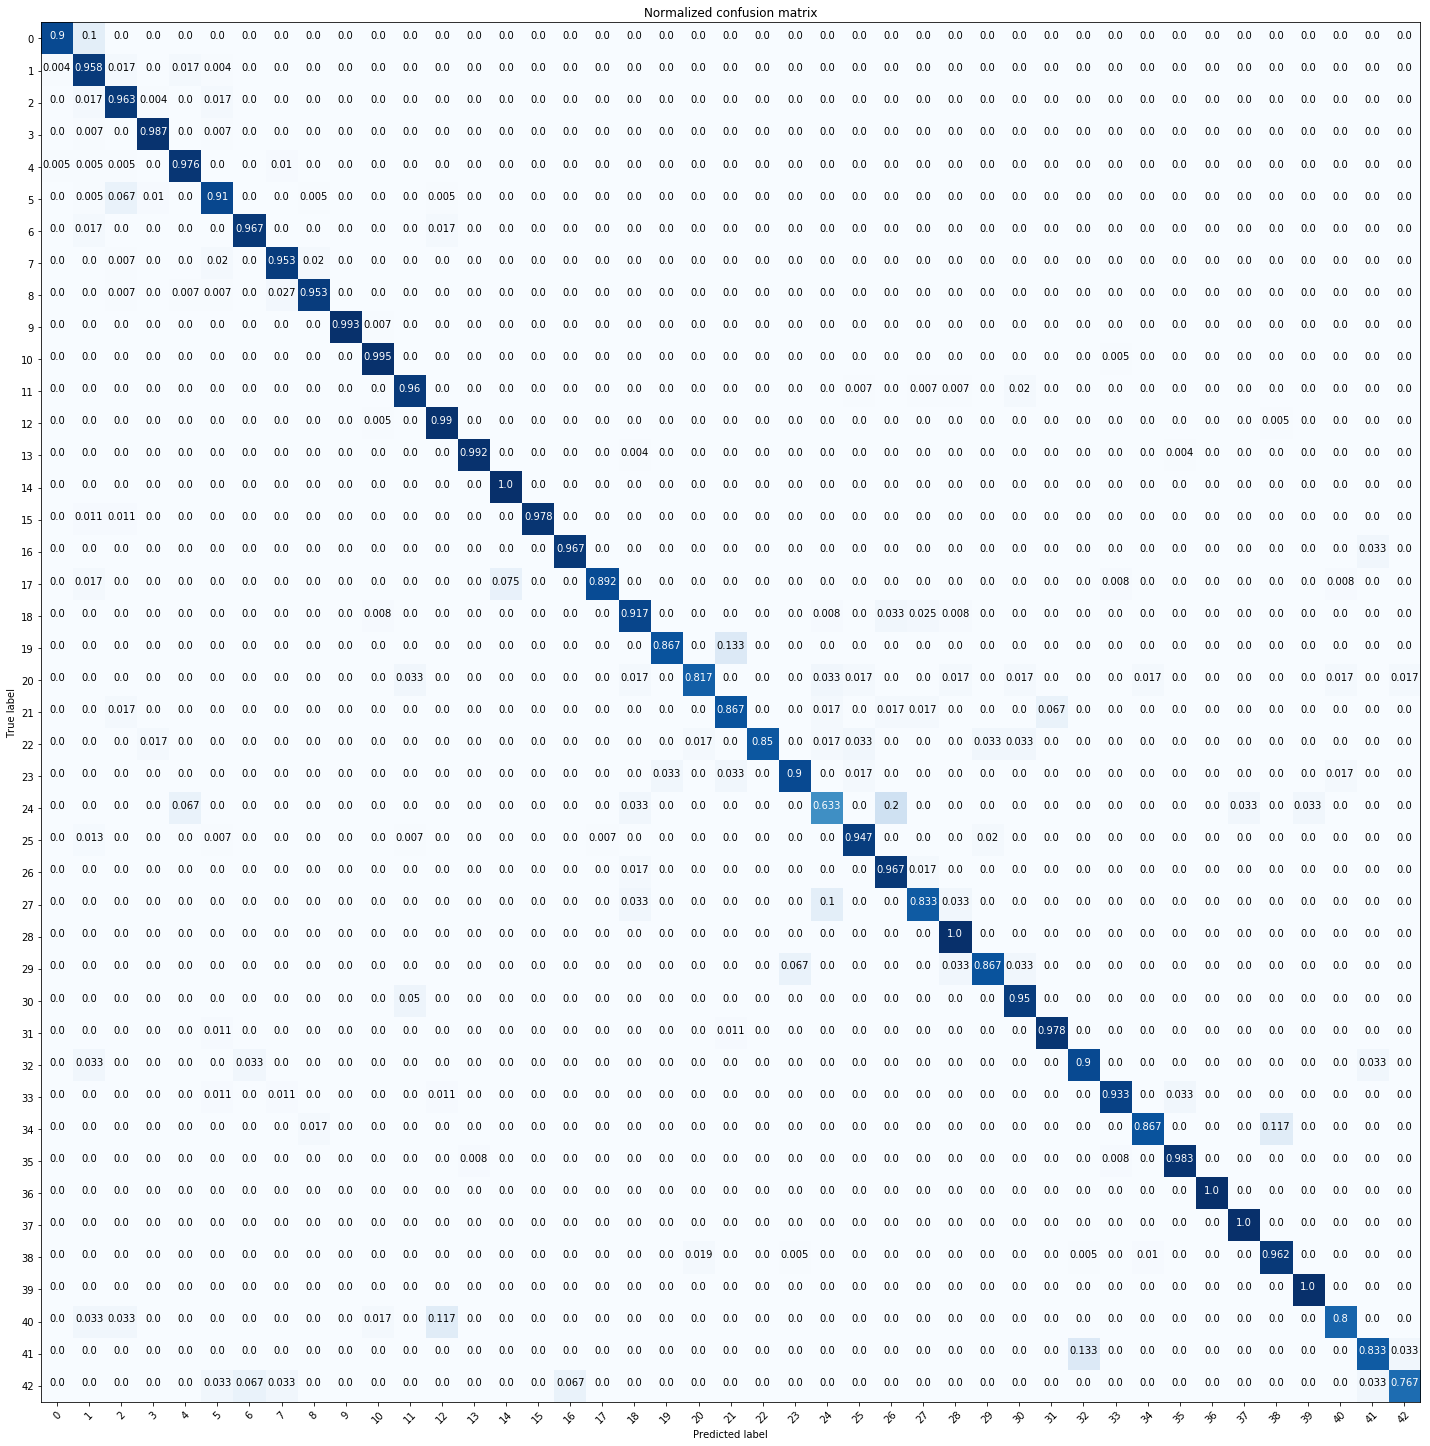

EPOCH 17 ...
Training Accuracy = 0.988
Validation Accuracy = 0.942
Test Accuracy = 0.921
Normalized confusion matrix


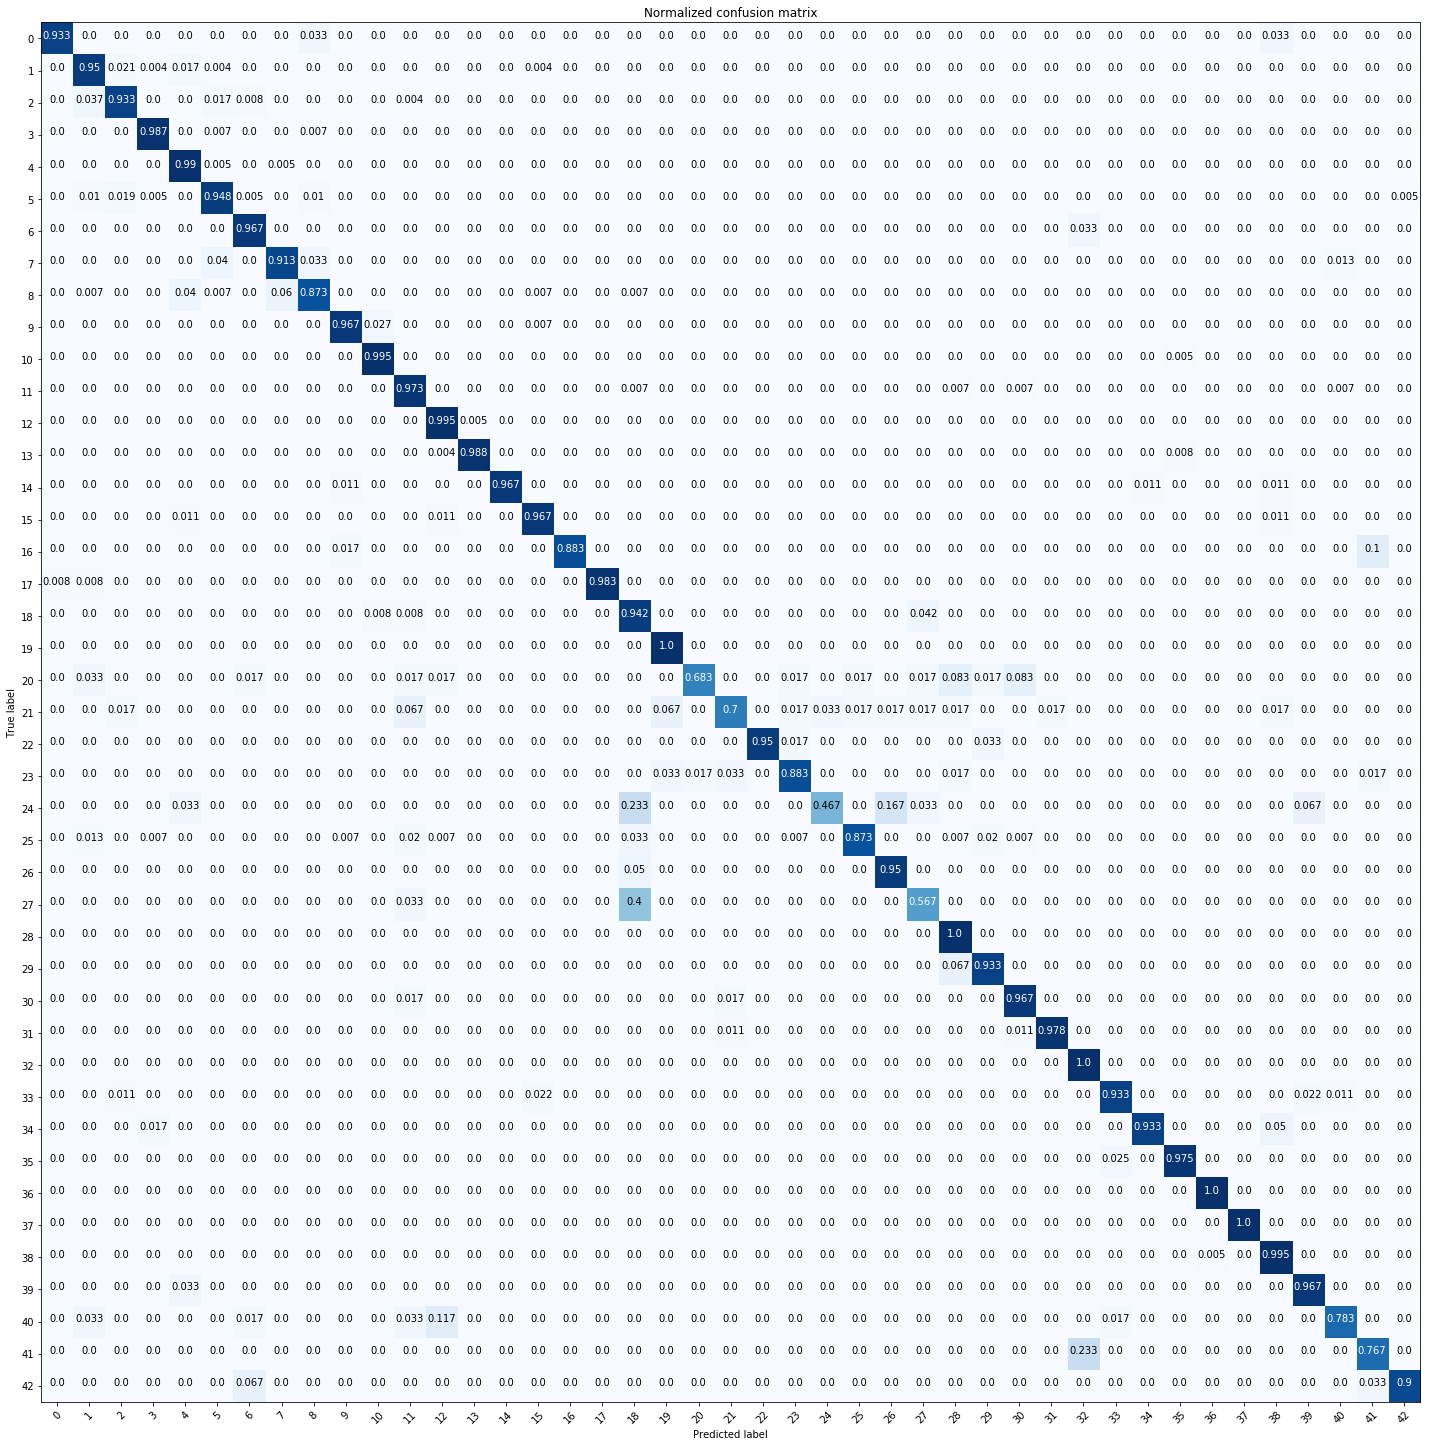

EPOCH 18 ...
Training Accuracy = 0.989
Validation Accuracy = 0.935
Test Accuracy = 0.921
Normalized confusion matrix


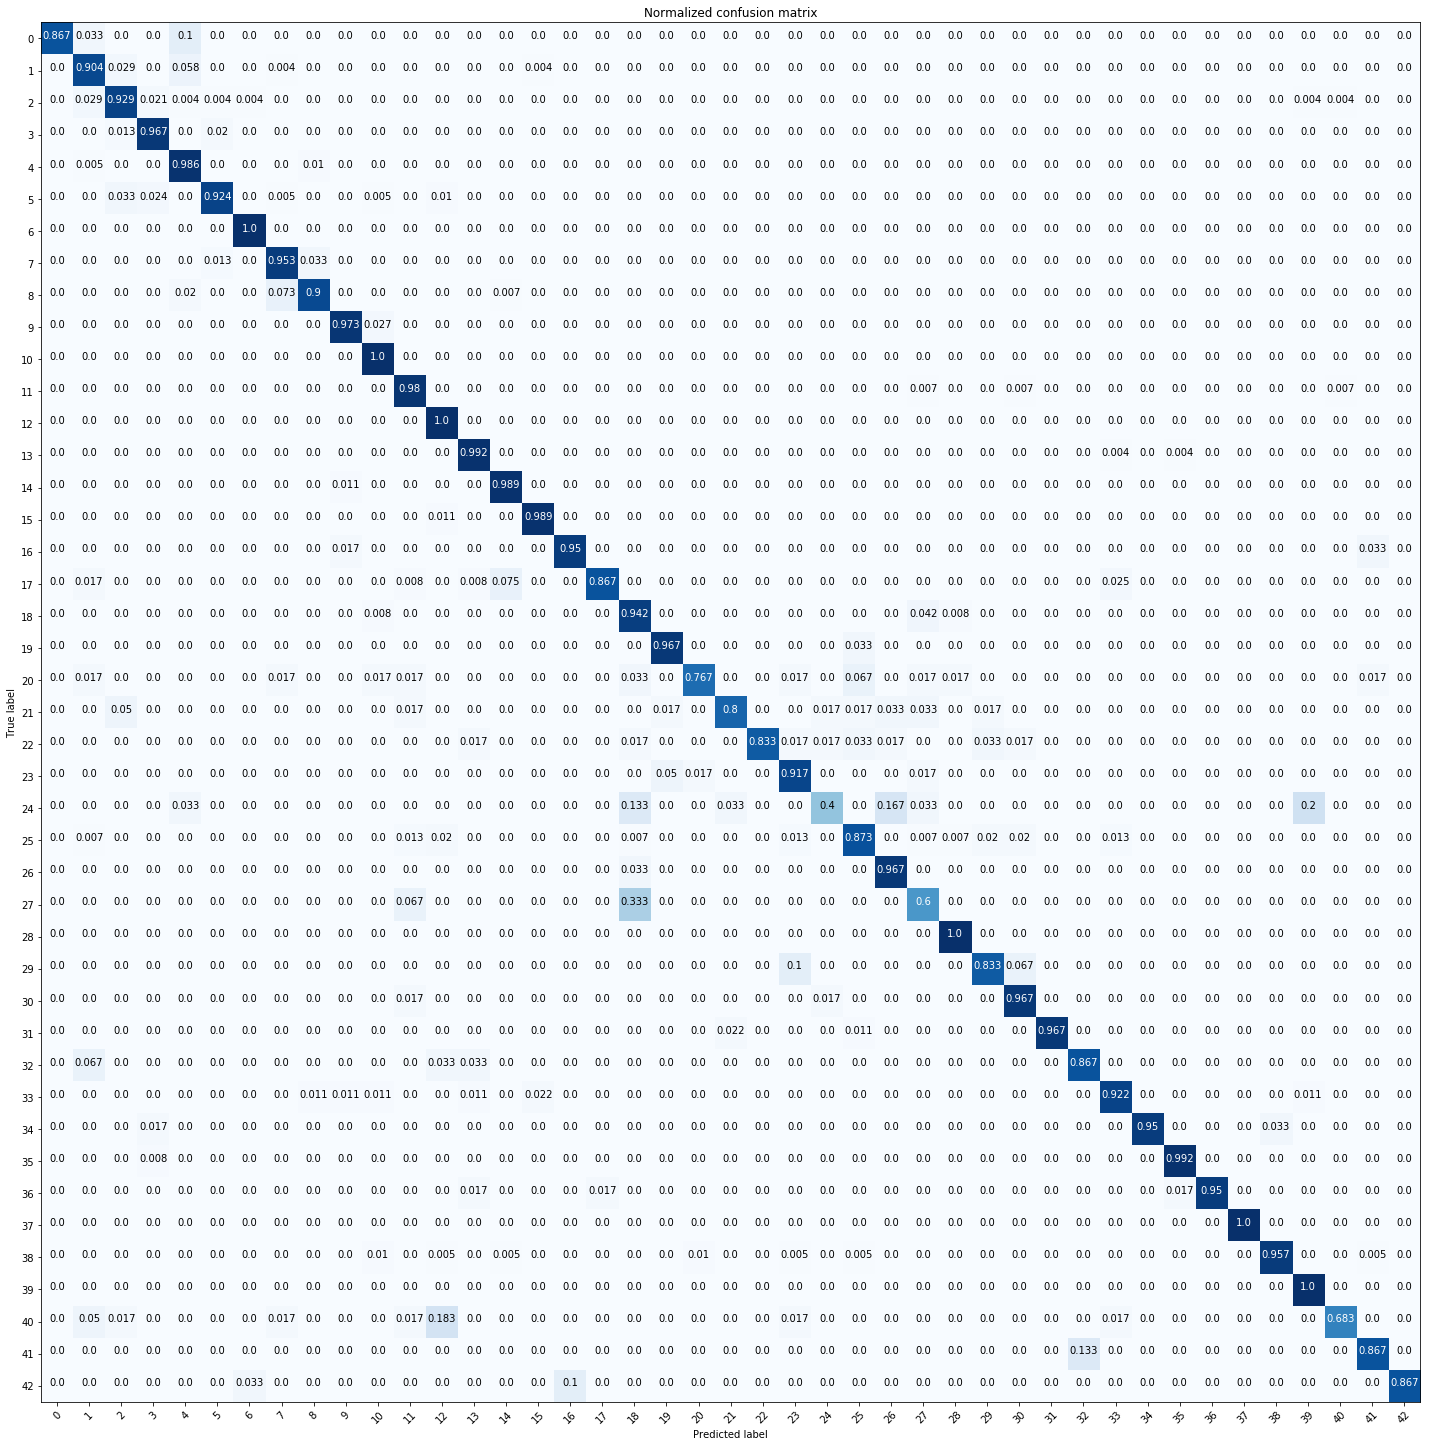

EPOCH 19 ...
Training Accuracy = 0.985
Validation Accuracy = 0.925
Test Accuracy = 0.913
Normalized confusion matrix


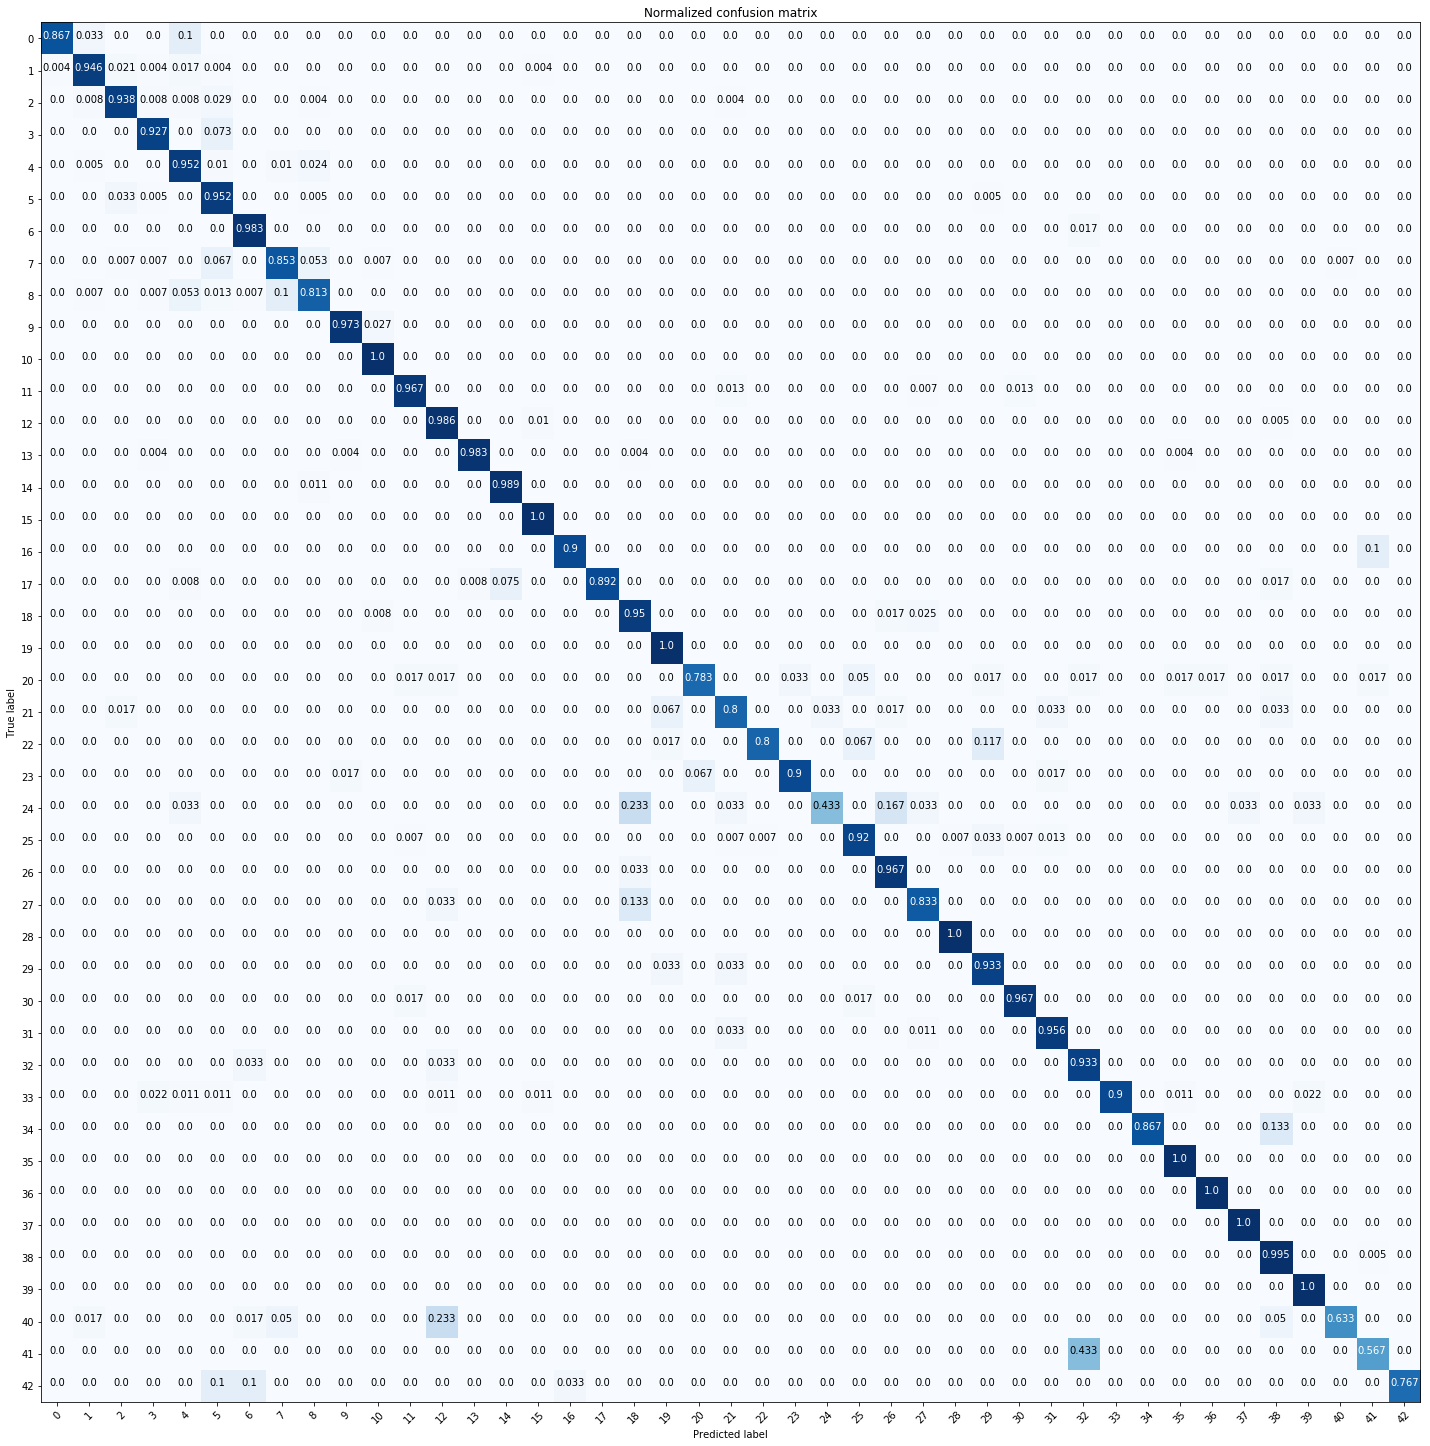

EPOCH 20 ...
Training Accuracy = 0.989
Validation Accuracy = 0.931
Test Accuracy = 0.923
Normalized confusion matrix


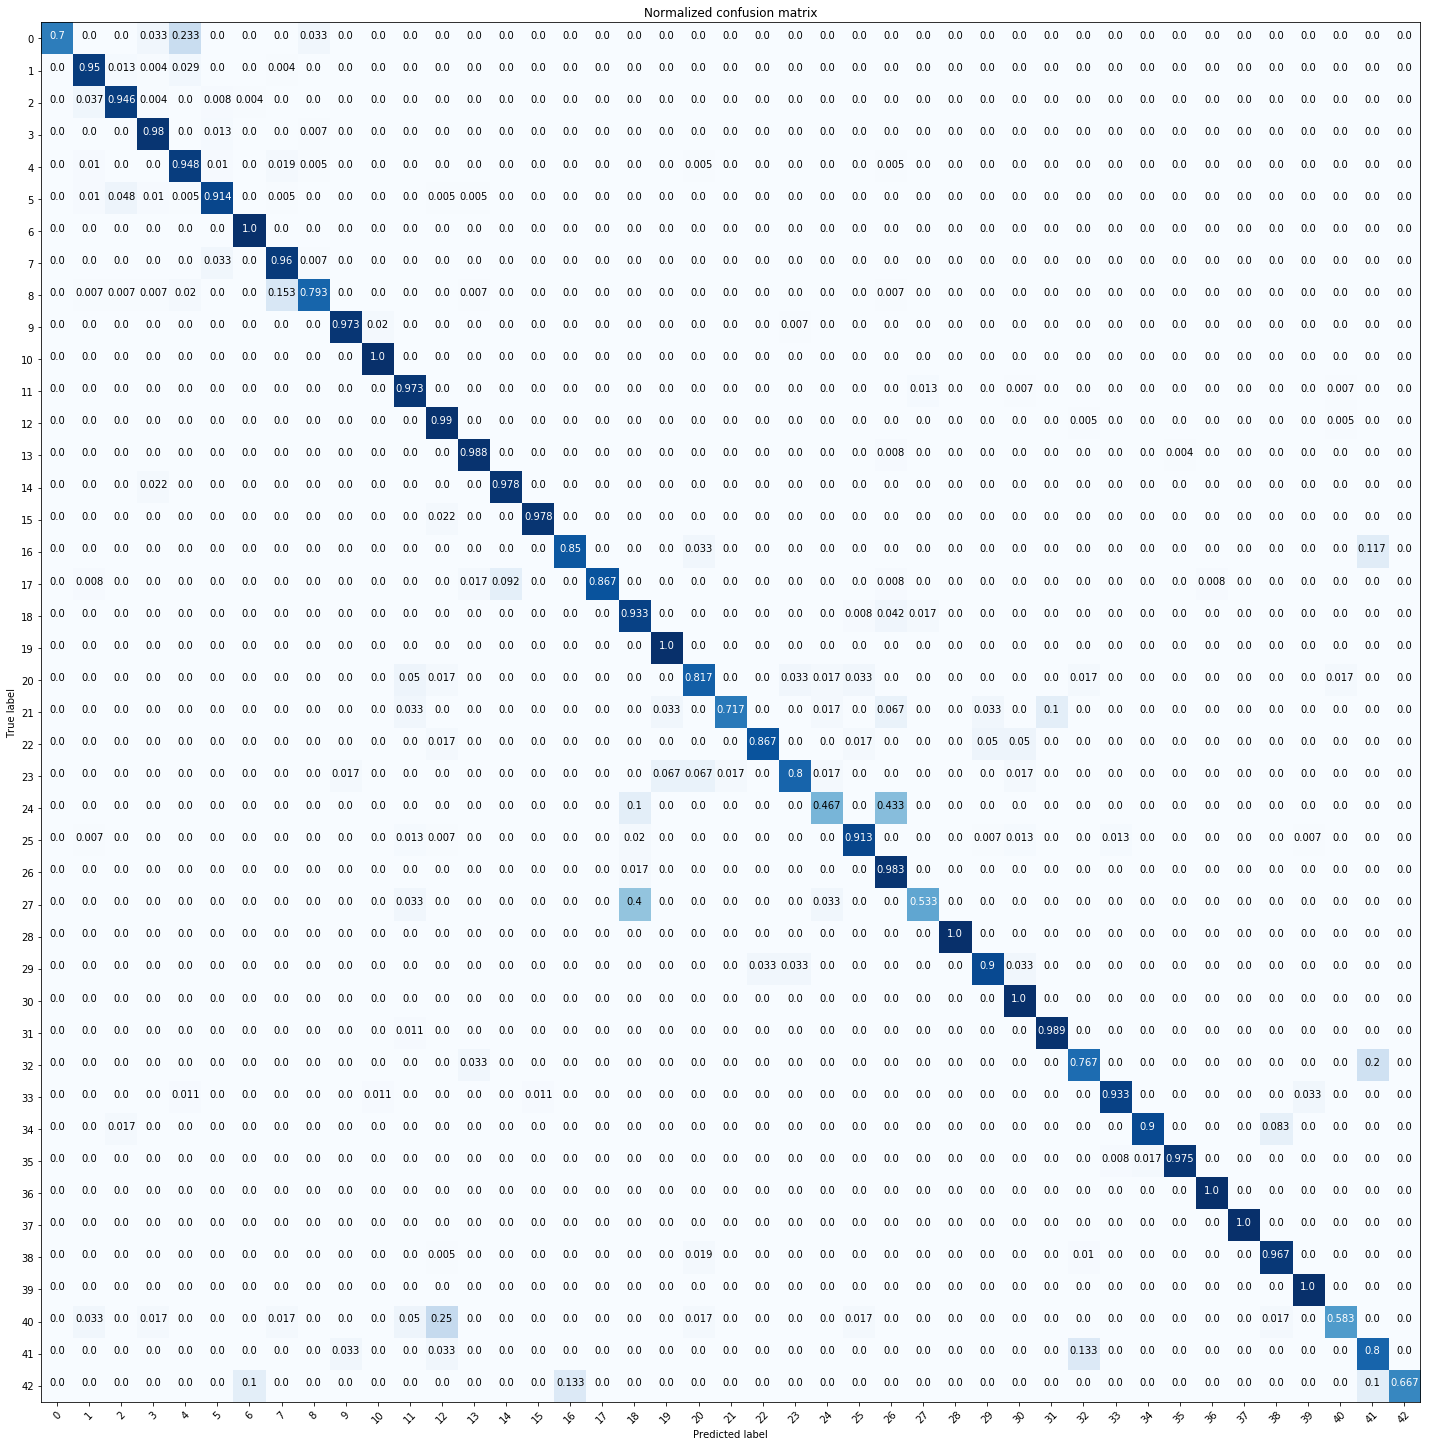

Model saved


In [7]:
# 7th code cell 

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

import itertools
from sklearn.metrics import confusion_matrix

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        print("Normalized confusion matrix")
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_shape = cm.shape
        
        # change to 3 digits decimal for better visualization
        cm = cm.flatten()
        cm = [float("{:.3f}".format(i)) for i in list(cm)]
        cm = np.array(cm).reshape(cm_shape)
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    thresh = cm.max() * 1./2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        test_accuracy = evaluate(X_test, y_test)
        print("EPOCH {} ...".format(i+1))

        # accuracy
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        
        # confusion matrix http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
        y_p = tf.argmax(logits, 1)
        y_pred = sess.run(y_p, feed_dict={x:X_valid})
        y_true = y_valid
        cnf_matrix = confusion_matrix(y_true, y_pred)
        np.set_printoptions(precision=2)
        plt.figure(figsize=(20,20))
        class_names = range(43)
        plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                              title='Normalized confusion matrix')
        plt.show()
        
    saver.save(sess, './lenet')
    print("Model saved")

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

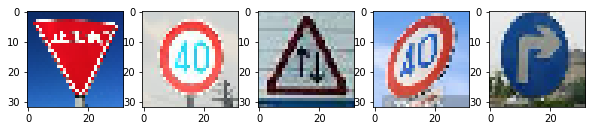

In [44]:
# 8th code cell 

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# let me download 9 png images from http://benchmark.ini.rub.de/?section=gtsrb&subsection=news
# I am not sure if the data is included in training set or not...

import matplotlib.image as mpimg
from PIL import Image

# shape the dataset such as X_test
X_web = []
filenames = ['a.png', 'b.png', 'c.png', 'd.png', 'e.png']
#filenames = ['1.png', '2.png', '3.png', '4.png', '5.png']
for filename in filenames:
#    webtest_file = '../traffic-signs-data/' + filename
#    img = Image.open(webtest_file)
#    img = img.resize((32, 32)) # resizes image in-place
#    X_web.append(np.array(img).tolist())

    png = Image.open('../traffic-signs-data/' + filename)
    png.load() # required for png.split()

    background = Image.new("RGB", png.size, (255, 255, 255))
    background.paste(png, mask=png.split()[3]) # 3 is the alpha channel
    background.save('foo.jpg', 'JPEG', quality=80)
    background = background.resize((32,32))
    X_web.append(np.array(background))
X_web = np.array(X_web) # not beautiful, but works okay for now.

# plot image
fig = plt.figure(figsize=(10, 2))
for i in range(5):    
    cur_num = int('15' + str(i+1))
    plt.subplot(cur_num)
    plt.imshow(X_web[i])
plt.show()

### Predict the Sign Type for Each Image

In [45]:
# 9th code cell 

### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Pre-process Data
X_web = X_web.reshape(5,32,32,3)
print(X_web.shape)
X_web = preprocess_pipeline(X_web)

# Define Prediction Operation
prediction_operation = tf.argmax(logits, 1)

# Apply Prediction Operation
with tf.Session() as sess:
    
    # restore from the previous data
    saver.restore(sess, "./lenet")

    # restore from the most latest one
    #saver.restore(sess, tf.train.latest_checkpoint('.')) # need to restore the weights

    output = sess.run(prediction_operation, feed_dict={x: X_web})
    
# Convert Label Num to Name
df_num2name = pd.read_csv('./signnames.csv')
dict_num2name = dict(df_num2name['SignName'])
dict_name2num = {v: k for k, v in dict_num2name.items()}
print(output)
print([dict_num2name[i] for i in output])


(5, 32, 32, 3)
[ 7  3 24  5 33]
['Speed limit (100km/h)', 'Speed limit (60km/h)', 'Road narrows on the right', 'Speed limit (80km/h)', 'Turn right ahead']


### Analyze Performance

In [46]:
# 10th code cell 

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# The label should be ...
y_web_name = ['Stop',
              'Speed limit (40km/h)', 
              'No Label in Germany Data', 
              'Speed limit (40km/h)', 
              'Turn right ahead']
y_web = [14, 43, 44, 43, 33]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.')) # need to restore the weights
    test_accuracy = evaluate(X_web, y_web)
    print("Web Sample Accuracy = {:.3f}".format(test_accuracy))

Web Sample Accuracy = 0.200


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

[[  8.03e-01   1.96e-01   8.81e-04   3.29e-05   1.14e-05]
 [  9.89e-01   5.47e-03   3.41e-03   2.02e-03   2.40e-04]
 [  9.65e-01   3.22e-02   2.76e-03   1.91e-04   7.02e-06]
 [  7.09e-01   2.87e-01   1.74e-03   6.01e-04   5.75e-04]
 [  1.00e+00   7.14e-07   7.01e-07   4.25e-07   3.15e-07]]
[[40 12 13  7 37]
 [ 3  1 32  2 12]
 [18 26 25  4 39]
 [ 3  5 35 14 10]
 [33 10 18 26 39]]


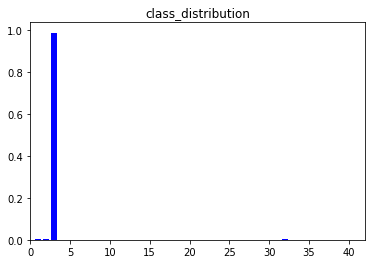

In [47]:
# 11th code cell 

### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_topK = tf.nn.top_k(tf.nn.softmax(logits, dim=-1, name=None), k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.')) # need to restore the weights
    output = sess.run(logits, feed_dict={x: X_web})
    out2 = sess.run(softmax_topK, feed_dict={logits: output})
#    print(out2)
    vals = out2.values
    idxs = out2.indices
    print(vals)
    print(idxs)
    
    plt.bar(idxs[1], vals[1], color='b')
#    plt.xticks(0, 42)
    plt.xlim(0, 42)
    plt.title('class_distribution')


#    out = sess.run(tf.nn.top_k(tf.constant(tf.nn.softmax(logits, dim=-1, name=None)), k=5)) 
#    print(out)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


Model Restored


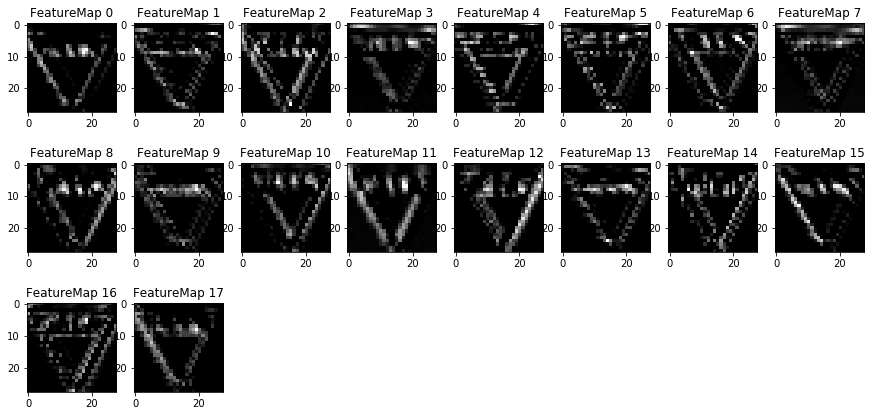

In [48]:
# 12th code cell 

# Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: 
#                the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure 
#                that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, 
#                     by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block,
#          just extend the plt number for each new feature map entry


def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            

#tf_activation = tf.Variable(tf.truncated_normal(shape=(5, 5, 18, 54)))
with tf.Session() as sess:

    # Restore the model
    saver.restore(sess, tf.train.latest_checkpoint('.')) # need to restore the weights
    print("Model Restored")

    # get the first activation node (first relu in my lenet)
    image_input = X_web[0].reshape([1,32,32,1])
    first_activation = sess.graph.get_tensor_by_name('conv_1_scope/Relu:0')
    plt_num = 10
    outputFeatureMap(image_input, first_activation, activation_min=-1, activation_max=-1, plt_num=10)
    plt.show()



### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 